<a href="https://colab.research.google.com/github/GarzonDiegoINL/Characterization/blob/main/EQE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **External quantum efficiency analysis**

By taking the EQE spectra of a solar cell we can determine the short-circuit current $(J_{sc})$ of the solar together with the band gap of the absorber $(E_{g})$ (generally CIGS).

# **Determination of $J_{sc}$**

The short-circuit current is calculated by following the next equation:

\begin{align}
J_{sc} = \frac{q}{hc}\int_{\lambda_1}^{\lambda_2} EQE(\lambda) \ \lambda \ \Phi_{AM1.5G} \ d\lambda
\end{align}

Where $EQE(\lambda)$ correspond to the measured spectra, $\Phi_{AM1.5G}$ is the  global standard sun spectrum, and $({\lambda_1},{\lambda_2})$ corresponds to the wavelenght range where the solar cells abosorbs light, for CIGS this will be between 300 and 1100nm.

There is a bit more of information regarding this in the followin links : [short-circuit current from EQE](https://ocw.tudelft.nl/wp-content/uploads/solar_energy_section_9_2.pdf), [Paper regarding EQE](https://onlinelibrary.wiley.com/doi/epdf/10.1002/aenm.202100022)

With this in mind, this program will take the data from the EQE spectra, multiply it for the respective AM1.5G spectra and take the numerical integral by applying the simpson's rule.

# **Determination of $E_{g}$**

The band gap of the abosorber can be estimated by taking the the inflection point of the EQE spectra in the absorption threshold region. This can be done by several methods and here two methods are done for every sample.

*   Sigmoid function and fit
*   Logartmic function with linear fit

Following [Almora, O. et. al.](https://onlinelibrary.wiley.com/doi/epdf/10.1002/aenm.202100022), the EQE in the wide wavelenght can be modeled by the following sigmoid function:

\begin{align}
EQE = \dfrac{A_m}{1+e^{(\kappa(\lambda-\lambda_g)/\lambda_s)}}
\end{align}

Where $\kappa = \ln{7+4\sqrt{3}},$  is  a  numeric  factor  that  results  from   calculating   the   roots   of   the   second   derivative. $A_m$  and  $\lambda_s$  are  fitting  parameters  related  to  the  maximum  EQE  just  after  the  step  and  the  slope  during  the  step. While  the  position  of  $\lambda_g$  corresponds  to  the  inflection  point  of  EQE. The band gap can be derived as:

\begin{align}
E_g = \frac{hc}{\lambda_g}
\end{align}

In addition, following [Keller, J.](https://www.researchgate.net/publication/352019926_Fundamental_characterization_of_thin-film_solar_cells_IV_and_QE) the band gap can be determined by taking into account that the following relation. Therefore, the $E_g$ can be obtained by doing a linear fit and getting the intercept of this line with the x-axis.

\begin{align}
(\ln{(1-EQE) \cdot E})^2 \propto E - E_g
\end{align}

In summary, this program will show two different graphs with the respective values of estimated $E_g$.

# **Instruction to run the code**

In order to run the code you have to continue with the following steps:

1.   Upload the txt files. In order to upload, click the folder button in the left of the screen and click the upload button (first button), and select the respective files files. For example:

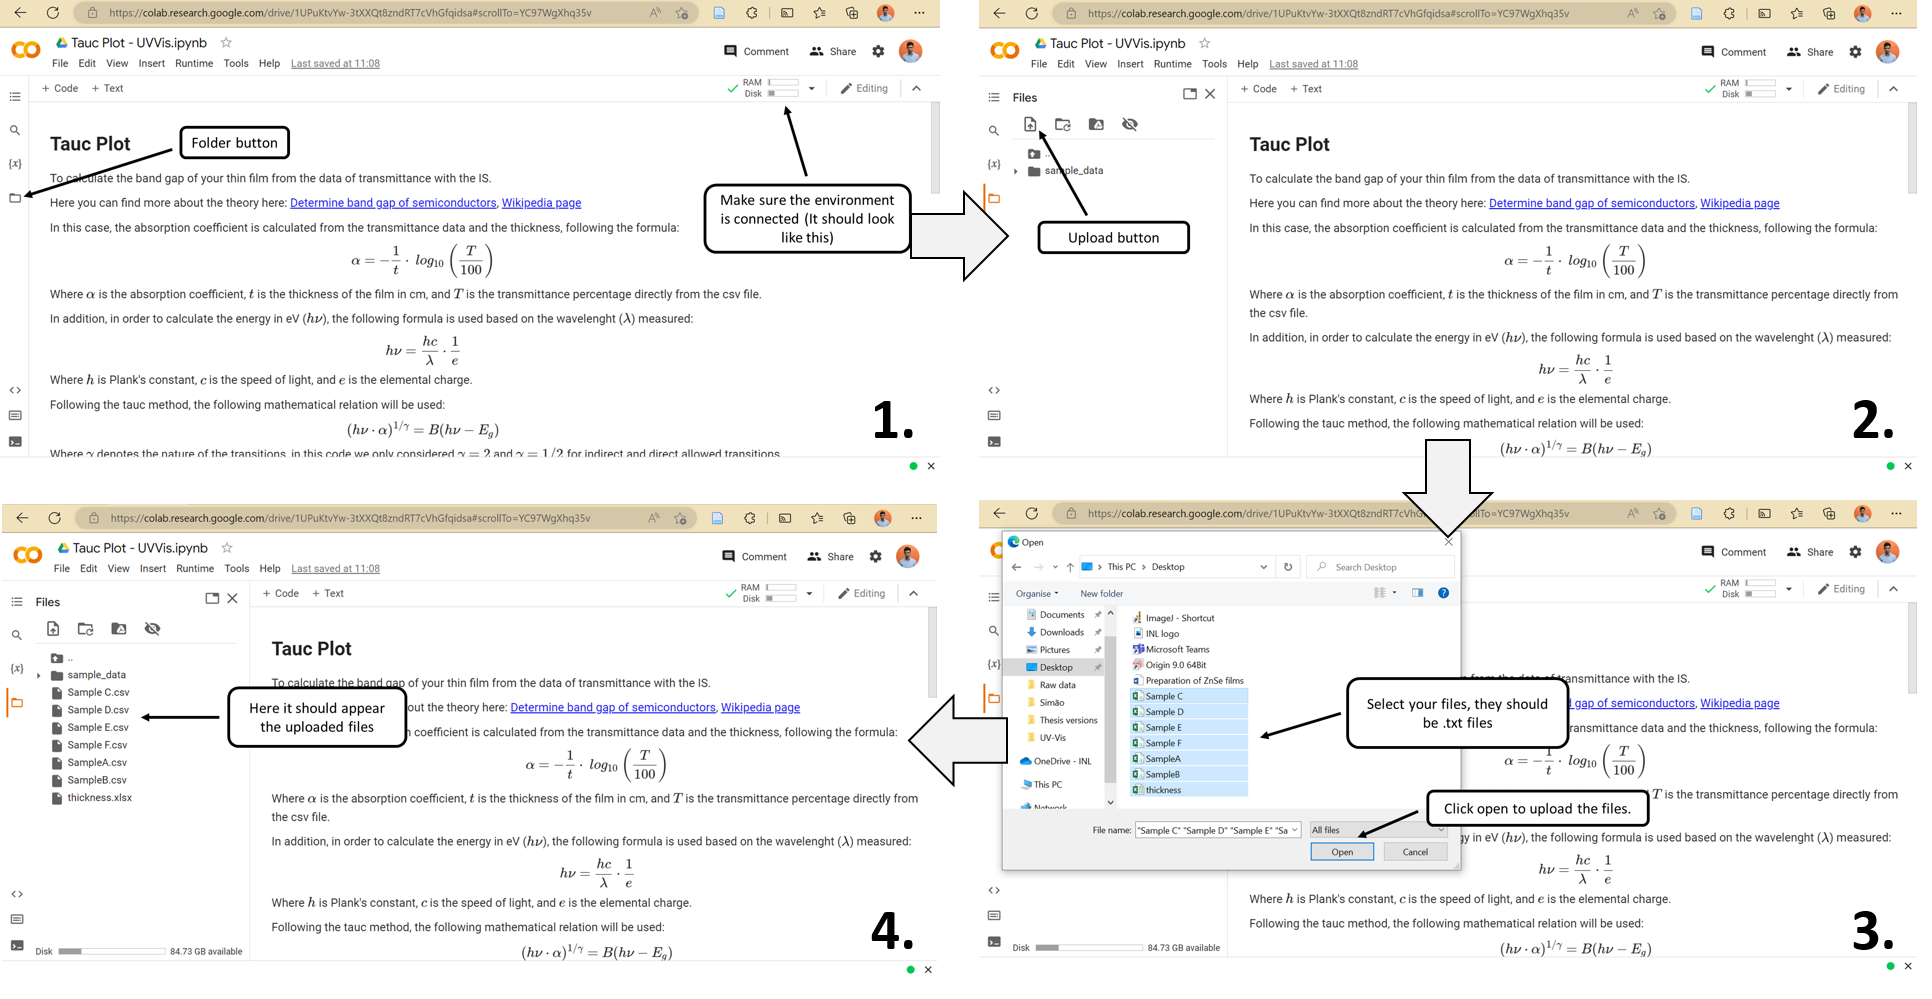

2. Run the following cells that will analyse the EQE spectra. To run the cells, select them and click Ctrl+Enter or the play button in the left of the cell. You can also click Ctrl+F9 to run all.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob as gl
from scipy.optimize import curve_fit
import os

#**AM1.5G Spectra**

In [ ]:
AM_spectra = [[ 280.0 , 4.7309e-23 ] , [ 280.5 , 1.2307e-21 ] , [ 281.0 , 5.6895e-21 ] , [ 281.5 , 1.5662e-19 ] , [ 282.0 , 1.1946e-18 ] , [ 282.5 , 4.5436e-18 ] , [ 283.0 , 1.8452e-17 ] , [ 283.5 , 3.536e-17 ] , [ 284.0 , 7.267e-16 ] , [ 284.5 , 2.4856e-15 ] , [ 285.0 , 8.0142e-15 ] , [ 285.5 , 4.2613e-14 ] , [ 286.0 , 1.3684e-13 ] , [ 286.5 , 8.3823e-13 ] , [ 287.0 , 2.7367e-12 ] , [ 287.5 , 1.0903e-11 ] , [ 288.0 , 6.2337e-11 ] , [ 288.5 , 1.7162e-10 ] , [ 289.0 , 5.6265e-10 ] , [ 289.5 , 2.0749e-09 ] , [ 290.0 , 6.0168e-09 ] , [ 290.5 , 1.3783e-08 ] , [ 291.0 , 3.5052e-08 ] , [ 291.5 , 1.0913e-07 ] , [ 292.0 , 2.683e-07 ] , [ 292.5 , 4.2685e-07 ] , [ 293.0 , 8.6466e-07 ] , [ 293.5 , 2.2707e-06 ] , [ 294.0 , 4.1744e-06 ] , [ 294.5 , 6.5911e-06 ] , [ 295.0 , 1.229e-05 ] , [ 295.5 , 2.7826e-05 ] , [ 296.0 , 4.7904e-05 ] , [ 296.5 , 7.1345e-05 ] , [ 297.0 , 9.68e-05 ] , [ 297.5 , 0.00018608 ] , [ 298.0 , 0.00028988 ] , [ 298.5 , 0.00035789 ] , [ 299.0 , 0.00049211 ] , [ 299.5 , 0.00086068 ] , [ 300.0 , 0.0010205 ] , [ 300.5 , 0.001245 ] , [ 301.0 , 0.00193 ] , [ 301.5 , 0.0026914 ] , [ 302.0 , 0.0029209 ] , [ 302.5 , 0.004284 ] , [ 303.0 , 0.0070945 ] , [ 303.5 , 0.0089795 ] , [ 304.0 , 0.0094701 ] , [ 304.5 , 0.011953 ] , [ 305.0 , 0.016463 ] , [ 305.5 , 0.018719 ] , [ 306.0 , 0.018577 ] , [ 306.5 , 0.021108 ] , [ 307.0 , 0.027849 ] , [ 307.5 , 0.035635 ] , [ 308.0 , 0.037837 ] , [ 308.5 , 0.04143 ] , [ 309.0 , 0.040534 ] , [ 309.5 , 0.043306 ] , [ 310.0 , 0.050939 ] , [ 310.5 , 0.06554 ] , [ 311.0 , 0.082922 ] , [ 311.5 , 0.08408 ] , [ 312.0 , 0.093376 ] , [ 312.5 , 0.098984 ] , [ 313.0 , 0.10733 ] , [ 313.5 , 0.10757 ] , [ 314.0 , 0.11969 ] , [ 314.5 , 0.1306 ] , [ 315.0 , 0.13625 ] , [ 315.5 , 0.11838 ] , [ 316.0 , 0.12348 ] , [ 316.5 , 0.15036 ] , [ 317.0 , 0.17158 ] , [ 317.5 , 0.18245 ] , [ 318.0 , 0.17594 ] , [ 318.5 , 0.18591 ] , [ 319.0 , 0.2047 ] , [ 319.5 , 0.19589 ] , [ 320.0 , 0.20527 ] , [ 320.5 , 0.24525 ] , [ 321.0 , 0.25024 ] , [ 321.5 , 0.23843 ] , [ 322.0 , 0.22203 ] , [ 322.5 , 0.21709 ] , [ 323.0 , 0.21226 ] , [ 323.5 , 0.24861 ] , [ 324.0 , 0.27537 ] , [ 324.5 , 0.28321 ] , [ 325.0 , 0.27894 ] , [ 325.5 , 0.32436 ] , [ 326.0 , 0.3812 ] , [ 326.5 , 0.40722 ] , [ 327.0 , 0.39806 ] , [ 327.5 , 0.38465 ] , [ 328.0 , 0.35116 ] , [ 328.5 , 0.37164 ] , [ 329.0 , 0.42235 ] , [ 329.5 , 0.46878 ] , [ 330.0 , 0.47139 ] , [ 330.5 , 0.428 ] , [ 331.0 , 0.40262 ] , [ 331.5 , 0.41806 ] , [ 332.0 , 0.43623 ] , [ 332.5 , 0.43919 ] , [ 333.0 , 0.42944 ] , [ 333.5 , 0.40724 ] , [ 334.0 , 0.41497 ] , [ 334.5 , 0.44509 ] , [ 335.0 , 0.46388 ] , [ 335.5 , 0.45313 ] , [ 336.0 , 0.41519 ] , [ 336.5 , 0.38214 ] , [ 337.0 , 0.3738 ] , [ 337.5 , 0.40051 ] , [ 338.0 , 0.43411 ] , [ 338.5 , 0.45527 ] , [ 339.0 , 0.46355 ] , [ 339.5 , 0.47446 ] , [ 340.0 , 0.5018 ] , [ 340.5 , 0.50071 ] , [ 341.0 , 0.47139 ] , [ 341.5 , 0.46935 ] , [ 342.0 , 0.48934 ] , [ 342.5 , 0.50767 ] , [ 343.0 , 0.51489 ] , [ 343.5 , 0.48609 ] , [ 344.0 , 0.41843 ] , [ 344.5 , 0.40307 ] , [ 345.0 , 0.45898 ] , [ 345.5 , 0.48932 ] , [ 346.0 , 0.47778 ] , [ 346.5 , 0.48657 ] , [ 347.0 , 0.49404 ] , [ 347.5 , 0.47674 ] , [ 348.0 , 0.47511 ] , [ 348.5 , 0.48336 ] , [ 349.0 , 0.46564 ] , [ 349.5 , 0.47805 ] , [ 350.0 , 0.52798 ] , [ 350.5 , 0.56741 ] , [ 351.0 , 0.55172 ] , [ 351.5 , 0.53022 ] , [ 352.0 , 0.51791 ] , [ 352.5 , 0.48962 ] , [ 353.0 , 0.5204 ] , [ 353.5 , 0.57228 ] , [ 354.0 , 0.60498 ] , [ 354.5 , 0.61156 ] , [ 355.0 , 0.6114 ] , [ 355.5 , 0.59028 ] , [ 356.0 , 0.55387 ] , [ 356.5 , 0.51942 ] , [ 357.0 , 0.45673 ] , [ 357.5 , 0.46215 ] , [ 358.0 , 0.43006 ] , [ 358.5 , 0.39926 ] , [ 359.0 , 0.46953 ] , [ 359.5 , 0.56549 ] , [ 360.0 , 0.59817 ] , [ 360.5 , 0.56531 ] , [ 361.0 , 0.52024 ] , [ 361.5 , 0.50956 ] , [ 362.0 , 0.5342 ] , [ 362.5 , 0.5851 ] , [ 363.0 , 0.60191 ] , [ 363.5 , 0.58541 ] , [ 364.0 , 0.60628 ] , [ 364.5 , 0.60058 ] , [ 365.0 , 0.62359 ] , [ 365.5 , 0.68628 ] , [ 366.0 , 0.73532 ] , [ 366.5 , 0.73658 ] , [ 367.0 , 0.72285 ] , [ 367.5 , 0.70914 ] , [ 368.0 , 0.66759 ] , [ 368.5 , 0.6631 ] , [ 369.0 , 0.69315 ] , [ 369.5 , 0.74469 ] , [ 370.0 , 0.75507 ] , [ 370.5 , 0.68261 ] , [ 371.0 , 0.69338 ] , [ 371.5 , 0.72051 ] , [ 372.0 , 0.67444 ] , [ 372.5 , 0.64253 ] , [ 373.0 , 0.61886 ] , [ 373.5 , 0.55786 ] , [ 374.0 , 0.5564 ] , [ 374.5 , 0.55227 ] , [ 375.0 , 0.5893 ] , [ 375.5 , 0.65162 ] , [ 376.0 , 0.6748 ] , [ 376.5 , 0.6639 ] , [ 377.0 , 0.71225 ] , [ 377.5 , 0.79455 ] , [ 378.0 , 0.85595 ] , [ 378.5 , 0.83418 ] , [ 379.0 , 0.74389 ] , [ 379.5 , 0.66683 ] , [ 380.0 , 0.70077 ] , [ 380.5 , 0.75075 ] , [ 381.0 , 0.76383 ] , [ 381.5 , 0.68837 ] , [ 382.0 , 0.58678 ] , [ 382.5 , 0.50762 ] , [ 383.0 , 0.45499 ] , [ 383.5 , 0.44049 ] , [ 384.0 , 0.50968 ] , [ 384.5 , 0.61359 ] , [ 385.0 , 0.67355 ] , [ 385.5 , 0.64363 ] , [ 386.0 , 0.621 ] , [ 386.5 , 0.6457 ] , [ 387.0 , 0.65147 ] , [ 387.5 , 0.64204 ] , [ 388.0 , 0.63582 ] , [ 388.5 , 0.63136 ] , [ 389.0 , 0.68543 ] , [ 389.5 , 0.7597 ] , [ 390.0 , 0.79699 ] , [ 390.5 , 0.80371 ] , [ 391.0 , 0.85138 ] , [ 391.5 , 0.86344 ] , [ 392.0 , 0.79493 ] , [ 392.5 , 0.66257 ] , [ 393.0 , 0.47975 ] , [ 393.5 , 0.38152 ] , [ 394.0 , 0.49567 ] , [ 394.5 , 0.68385 ] , [ 395.0 , 0.80772 ] , [ 395.5 , 0.86038 ] , [ 396.0 , 0.75655 ] , [ 396.5 , 0.55017 ] , [ 397.0 , 0.42619 ] , [ 397.5 , 0.62945 ] , [ 398.0 , 0.85249 ] , [ 398.5 , 1.0069 ] , [ 399.0 , 1.0693 ] , [ 399.5 , 1.1021 ] , [ 400.0 , 1.1141 ] , [ 401.0 , 1.1603 ] , [ 402.0 , 1.2061 ] , [ 403.0 , 1.1613 ] , [ 404.0 , 1.1801 ] , [ 405.0 , 1.1511 ] , [ 406.0 , 1.1227 ] , [ 407.0 , 1.1026 ] , [ 408.0 , 1.1514 ] , [ 409.0 , 1.2299 ] , [ 410.0 , 1.0485 ] , [ 411.0 , 1.1738 ] , [ 412.0 , 1.2478 ] , [ 413.0 , 1.1971 ] , [ 414.0 , 1.1842 ] , [ 415.0 , 1.2258 ] , [ 416.0 , 1.2624 ] , [ 417.0 , 1.2312 ] , [ 418.0 , 1.1777 ] , [ 419.0 , 1.2258 ] , [ 420.0 , 1.1232 ] , [ 421.0 , 1.2757 ] , [ 422.0 , 1.2583 ] , [ 423.0 , 1.2184 ] , [ 424.0 , 1.2117 ] , [ 425.0 , 1.2488 ] , [ 426.0 , 1.2135 ] , [ 427.0 , 1.1724 ] , [ 428.0 , 1.1839 ] , [ 429.0 , 1.0963 ] , [ 430.0 , 0.87462 ] , [ 431.0 , 0.79394 ] , [ 432.0 , 1.3207 ] , [ 433.0 , 1.2288 ] , [ 434.0 , 1.1352 ] , [ 435.0 , 1.2452 ] , [ 436.0 , 1.3659 ] , [ 437.0 , 1.3943 ] , [ 438.0 , 1.2238 ] , [ 439.0 , 1.1775 ] , [ 440.0 , 1.3499 ] , [ 441.0 , 1.3313 ] , [ 442.0 , 1.425 ] , [ 443.0 , 1.4453 ] , [ 444.0 , 1.4084 ] , [ 445.0 , 1.4619 ] , [ 446.0 , 1.3108 ] , [ 447.0 , 1.4903 ] , [ 448.0 , 1.5081 ] , [ 449.0 , 1.5045 ] , [ 450.0 , 1.5595 ] , [ 451.0 , 1.6173 ] , [ 452.0 , 1.5482 ] , [ 453.0 , 1.4297 ] , [ 454.0 , 1.5335 ] , [ 455.0 , 1.5224 ] , [ 456.0 , 1.5724 ] , [ 457.0 , 1.5854 ] , [ 458.0 , 1.5514 ] , [ 459.0 , 1.5391 ] , [ 460.0 , 1.5291 ] , [ 461.0 , 1.5827 ] , [ 462.0 , 1.5975 ] , [ 463.0 , 1.6031 ] , [ 464.0 , 1.5544 ] , [ 465.0 , 1.535 ] , [ 466.0 , 1.5673 ] , [ 467.0 , 1.4973 ] , [ 468.0 , 1.5619 ] , [ 469.0 , 1.5682 ] , [ 470.0 , 1.5077 ] , [ 471.0 , 1.5331 ] , [ 472.0 , 1.6126 ] , [ 473.0 , 1.5499 ] , [ 474.0 , 1.5671 ] , [ 475.0 , 1.6185 ] , [ 476.0 , 1.5631 ] , [ 477.0 , 1.5724 ] , [ 478.0 , 1.623 ] , [ 479.0 , 1.5916 ] , [ 480.0 , 1.6181 ] , [ 481.0 , 1.6177 ] , [ 482.0 , 1.6236 ] , [ 483.0 , 1.6038 ] , [ 484.0 , 1.5734 ] , [ 485.0 , 1.5683 ] , [ 486.0 , 1.2716 ] , [ 487.0 , 1.4241 ] , [ 488.0 , 1.5413 ] , [ 489.0 , 1.4519 ] , [ 490.0 , 1.6224 ] , [ 491.0 , 1.5595 ] , [ 492.0 , 1.4869 ] , [ 493.0 , 1.5903 ] , [ 494.0 , 1.5525 ] , [ 495.0 , 1.6485 ] , [ 496.0 , 1.5676 ] , [ 497.0 , 1.5944 ] , [ 498.0 , 1.5509 ] , [ 499.0 , 1.5507 ] , [ 500.0 , 1.5451 ] , [ 501.0 , 1.4978 ] , [ 502.0 , 1.4966 ] , [ 503.0 , 1.5653 ] , [ 504.0 , 1.4587 ] , [ 505.0 , 1.5635 ] , [ 506.0 , 1.6264 ] , [ 507.0 , 1.556 ] , [ 508.0 , 1.5165 ] , [ 509.0 , 1.5893 ] , [ 510.0 , 1.5481 ] , [ 511.0 , 1.5769 ] , [ 512.0 , 1.6186 ] , [ 513.0 , 1.5206 ] , [ 514.0 , 1.4885 ] , [ 515.0 , 1.5314 ] , [ 516.0 , 1.5455 ] , [ 517.0 , 1.2594 ] , [ 518.0 , 1.4403 ] , [ 519.0 , 1.3957 ] , [ 520.0 , 1.5236 ] , [ 521.0 , 1.5346 ] , [ 522.0 , 1.569 ] , [ 523.0 , 1.4789 ] , [ 524.0 , 1.5905 ] , [ 525.0 , 1.5781 ] , [ 526.0 , 1.5341 ] , [ 527.0 , 1.3417 ] , [ 528.0 , 1.5357 ] , [ 529.0 , 1.6071 ] , [ 530.0 , 1.5446 ] , [ 531.0 , 1.6292 ] , [ 532.0 , 1.5998 ] , [ 533.0 , 1.4286 ] , [ 534.0 , 1.5302 ] , [ 535.0 , 1.5535 ] , [ 536.0 , 1.6199 ] , [ 537.0 , 1.4989 ] , [ 538.0 , 1.5738 ] , [ 539.0 , 1.5352 ] , [ 540.0 , 1.4825 ] , [ 541.0 , 1.4251 ] , [ 542.0 , 1.5511 ] , [ 543.0 , 1.5256 ] , [ 544.0 , 1.5792 ] , [ 545.0 , 1.5435 ] , [ 546.0 , 1.5291 ] , [ 547.0 , 1.549 ] , [ 548.0 , 1.5049 ] , [ 549.0 , 1.552 ] , [ 550.0 , 1.5399 ] , [ 551.0 , 1.5382 ] , [ 552.0 , 1.5697 ] , [ 553.0 , 1.525 ] , [ 554.0 , 1.5549 ] , [ 555.0 , 1.5634 ] , [ 556.0 , 1.5366 ] , [ 557.0 , 1.4988 ] , [ 558.0 , 1.531 ] , [ 559.0 , 1.4483 ] , [ 560.0 , 1.474 ] , [ 561.0 , 1.5595 ] , [ 562.0 , 1.4847 ] , [ 563.0 , 1.5408 ] , [ 564.0 , 1.5106 ] , [ 565.0 , 1.5201 ] , [ 566.0 , 1.4374 ] , [ 567.0 , 1.532 ] , [ 568.0 , 1.518 ] , [ 569.0 , 1.4807 ] , [ 570.0 , 1.4816 ] , [ 571.0 , 1.4331 ] , [ 572.0 , 1.5134 ] , [ 573.0 , 1.5198 ] , [ 574.0 , 1.5119 ] , [ 575.0 , 1.4777 ] , [ 576.0 , 1.4654 ] , [ 577.0 , 1.5023 ] , [ 578.0 , 1.456 ] , [ 579.0 , 1.477 ] , [ 580.0 , 1.502 ] , [ 581.0 , 1.5089 ] , [ 582.0 , 1.532 ] , [ 583.0 , 1.5479 ] , [ 584.0 , 1.5448 ] , [ 585.0 , 1.5324 ] , [ 586.0 , 1.4953 ] , [ 587.0 , 1.5281 ] , [ 588.0 , 1.4934 ] , [ 589.0 , 1.2894 ] , [ 590.0 , 1.3709 ] , [ 591.0 , 1.4662 ] , [ 592.0 , 1.4354 ] , [ 593.0 , 1.4561 ] , [ 594.0 , 1.4491 ] , [ 595.0 , 1.4308 ] , [ 596.0 , 1.4745 ] , [ 597.0 , 1.4788 ] , [ 598.0 , 1.4607 ] , [ 599.0 , 1.4606 ] , [ 600.0 , 1.4753 ] , [ 601.0 , 1.4579 ] , [ 602.0 , 1.436 ] , [ 603.0 , 1.4664 ] , [ 604.0 , 1.4921 ] , [ 605.0 , 1.4895 ] , [ 606.0 , 1.4822 ] , [ 607.0 , 1.4911 ] , [ 608.0 , 1.4862 ] , [ 609.0 , 1.4749 ] , [ 610.0 , 1.4686 ] , [ 611.0 , 1.4611 ] , [ 612.0 , 1.4831 ] , [ 613.0 , 1.4621 ] , [ 614.0 , 1.4176 ] , [ 615.0 , 1.4697 ] , [ 616.0 , 1.431 ] , [ 617.0 , 1.4128 ] , [ 618.0 , 1.4664 ] , [ 619.0 , 1.4733 ] , [ 620.0 , 1.4739 ] , [ 621.0 , 1.4802 ] , [ 622.0 , 1.4269 ] , [ 623.0 , 1.4165 ] , [ 624.0 , 1.4118 ] , [ 625.0 , 1.4026 ] , [ 626.0 , 1.4012 ] , [ 627.0 , 1.4417 ] , [ 628.0 , 1.3631 ] , [ 629.0 , 1.4114 ] , [ 630.0 , 1.3924 ] , [ 631.0 , 1.4161 ] , [ 632.0 , 1.3638 ] , [ 633.0 , 1.4508 ] , [ 634.0 , 1.4284 ] , [ 635.0 , 1.4458 ] , [ 636.0 , 1.4128 ] , [ 637.0 , 1.461 ] , [ 638.0 , 1.4707 ] , [ 639.0 , 1.4646 ] , [ 640.0 , 1.434 ] , [ 641.0 , 1.4348 ] , [ 642.0 , 1.4376 ] , [ 643.0 , 1.4525 ] , [ 644.0 , 1.4462 ] , [ 645.0 , 1.4567 ] , [ 646.0 , 1.415 ] , [ 647.0 , 1.4086 ] , [ 648.0 , 1.3952 ] , [ 649.0 , 1.3519 ] , [ 650.0 , 1.3594 ] , [ 651.0 , 1.4447 ] , [ 652.0 , 1.3871 ] , [ 653.0 , 1.4311 ] , [ 654.0 , 1.4153 ] , [ 655.0 , 1.3499 ] , [ 656.0 , 1.1851 ] , [ 657.0 , 1.2393 ] , [ 658.0 , 1.3855 ] , [ 659.0 , 1.3905 ] , [ 660.0 , 1.3992 ] , [ 661.0 , 1.3933 ] , [ 662.0 , 1.3819 ] , [ 663.0 , 1.3844 ] , [ 664.0 , 1.3967 ] , [ 665.0 , 1.4214 ] , [ 666.0 , 1.4203 ] , [ 667.0 , 1.4102 ] , [ 668.0 , 1.415 ] , [ 669.0 , 1.4394 ] , [ 670.0 , 1.4196 ] , [ 671.0 , 1.4169 ] , [ 672.0 , 1.3972 ] , [ 673.0 , 1.4094 ] , [ 674.0 , 1.4074 ] , [ 675.0 , 1.3958 ] , [ 676.0 , 1.412 ] , [ 677.0 , 1.3991 ] , [ 678.0 , 1.4066 ] , [ 679.0 , 1.3947 ] , [ 680.0 , 1.3969 ] , [ 681.0 , 1.3915 ] , [ 682.0 , 1.3981 ] , [ 683.0 , 1.383 ] , [ 684.0 , 1.3739 ] , [ 685.0 , 1.3748 ] , [ 686.0 , 1.3438 ] , [ 687.0 , 0.96824 ] , [ 688.0 , 1.1206 ] , [ 689.0 , 1.1278 ] , [ 690.0 , 1.1821 ] , [ 691.0 , 1.2333 ] , [ 692.0 , 1.2689 ] , [ 693.0 , 1.2609 ] , [ 694.0 , 1.2464 ] , [ 695.0 , 1.2714 ] , [ 696.0 , 1.2684 ] , [ 697.0 , 1.3403 ] , [ 698.0 , 1.3192 ] , [ 699.0 , 1.2918 ] , [ 700.0 , 1.2823 ] , [ 701.0 , 1.2659 ] , [ 702.0 , 1.2674 ] , [ 703.0 , 1.2747 ] , [ 704.0 , 1.3078 ] , [ 705.0 , 1.3214 ] , [ 706.0 , 1.3144 ] , [ 707.0 , 1.309 ] , [ 708.0 , 1.3048 ] , [ 709.0 , 1.3095 ] , [ 710.0 , 1.3175 ] , [ 711.0 , 1.3155 ] , [ 712.0 , 1.3071 ] , [ 713.0 , 1.2918 ] , [ 714.0 , 1.3029 ] , [ 715.0 , 1.2587 ] , [ 716.0 , 1.2716 ] , [ 717.0 , 1.1071 ] , [ 718.0 , 1.0296 ] , [ 719.0 , 0.92318 ] , [ 720.0 , 0.9855 ] , [ 721.0 , 1.0861 ] , [ 722.0 , 1.2407 ] , [ 723.0 , 1.1444 ] , [ 724.0 , 1.0555 ] , [ 725.0 , 1.038 ] , [ 726.0 , 1.0813 ] , [ 727.0 , 1.085 ] , [ 728.0 , 1.04 ] , [ 729.0 , 1.0466 ] , [ 730.0 , 1.1285 ] , [ 731.0 , 1.0703 ] , [ 732.0 , 1.1534 ] , [ 733.0 , 1.1962 ] , [ 734.0 , 1.2357 ] , [ 735.0 , 1.2178 ] , [ 736.0 , 1.2059 ] , [ 737.0 , 1.2039 ] , [ 738.0 , 1.2269 ] , [ 739.0 , 1.1905 ] , [ 740.0 , 1.2195 ] , [ 741.0 , 1.2148 ] , [ 742.0 , 1.2153 ] , [ 743.0 , 1.2405 ] , [ 744.0 , 1.2503 ] , [ 745.0 , 1.2497 ] , [ 746.0 , 1.247 ] , [ 747.0 , 1.2477 ] , [ 748.0 , 1.2401 ] , [ 749.0 , 1.2357 ] , [ 750.0 , 1.2341 ] , [ 751.0 , 1.2286 ] , [ 752.0 , 1.233 ] , [ 753.0 , 1.2266 ] , [ 754.0 , 1.242 ] , [ 755.0 , 1.2383 ] , [ 756.0 , 1.2232 ] , [ 757.0 , 1.2221 ] , [ 758.0 , 1.2295 ] , [ 759.0 , 1.1945 ] , [ 760.0 , 0.26604 ] , [ 761.0 , 0.15396 ] , [ 762.0 , 0.68766 ] , [ 763.0 , 0.37952 ] , [ 764.0 , 0.53878 ] , [ 765.0 , 0.68601 ] , [ 766.0 , 0.81461 ] , [ 767.0 , 0.97417 ] , [ 768.0 , 1.1138 ] , [ 769.0 , 1.1278 ] , [ 770.0 , 1.1608 ] , [ 771.0 , 1.1686 ] , [ 772.0 , 1.1778 ] , [ 773.0 , 1.1771 ] , [ 774.0 , 1.1771 ] , [ 775.0 , 1.1771 ] , [ 776.0 , 1.1798 ] , [ 777.0 , 1.1727 ] , [ 778.0 , 1.1713 ] , [ 779.0 , 1.1765 ] , [ 780.0 , 1.1636 ] , [ 781.0 , 1.1607 ] , [ 782.0 , 1.1662 ] , [ 783.0 , 1.1614 ] , [ 784.0 , 1.1536 ] , [ 785.0 , 1.1586 ] , [ 786.0 , 1.1592 ] , [ 787.0 , 1.145 ] , [ 788.0 , 1.1305 ] , [ 789.0 , 1.1257 ] , [ 790.0 , 1.091 ] , [ 791.0 , 1.1058 ] , [ 792.0 , 1.0953 ] , [ 793.0 , 1.0875 ] , [ 794.0 , 1.0972 ] , [ 795.0 , 1.0932 ] , [ 796.0 , 1.0742 ] , [ 797.0 , 1.0913 ] , [ 798.0 , 1.1121 ] , [ 799.0 , 1.0905 ] , [ 800.0 , 1.0725 ] , [ 801.0 , 1.0843 ] , [ 802.0 , 1.0856 ] , [ 803.0 , 1.0657 ] , [ 804.0 , 1.0782 ] , [ 805.0 , 1.0545 ] , [ 806.0 , 1.0974 ] , [ 807.0 , 1.0859 ] , [ 808.0 , 1.0821 ] , [ 809.0 , 1.0548 ] , [ 810.0 , 1.0559 ] , [ 811.0 , 1.0533 ] , [ 812.0 , 1.0268 ] , [ 813.0 , 1.0086 ] , [ 814.0 , 0.90356 ] , [ 815.0 , 0.89523 ] , [ 816.0 , 0.83216 ] , [ 817.0 , 0.85183 ] , [ 818.0 , 0.82259 ] , [ 819.0 , 0.90519 ] , [ 820.0 , 0.86188 ] , [ 821.0 , 0.99764 ] , [ 822.0 , 0.95157 ] , [ 823.0 , 0.67271 ] , [ 824.0 , 0.93506 ] , [ 825.0 , 0.96935 ] , [ 826.0 , 0.93381 ] , [ 827.0 , 0.98465 ] , [ 828.0 , 0.84979 ] , [ 829.0 , 0.9293 ] , [ 830.0 , 0.91601 ] , [ 831.0 , 0.92392 ] , [ 832.0 , 0.89426 ] , [ 833.0 , 0.9565 ] , [ 834.0 , 0.93412 ] , [ 835.0 , 1.0032 ] , [ 836.0 , 0.97234 ] , [ 837.0 , 1.0092 ] , [ 838.0 , 0.99901 ] , [ 839.0 , 1.0013 ] , [ 840.0 , 1.0157 ] , [ 841.0 , 1.0101 ] , [ 842.0 , 0.99703 ] , [ 843.0 , 1.0053 ] , [ 844.0 , 0.98631 ] , [ 845.0 , 1.0165 ] , [ 846.0 , 1.0187 ] , [ 847.0 , 0.9917 ] , [ 848.0 , 0.99217 ] , [ 849.0 , 0.98596 ] , [ 850.0 , 0.89372 ] , [ 851.0 , 0.97493 ] , [ 852.0 , 0.96927 ] , [ 853.0 , 0.96486 ] , [ 854.0 , 0.85112 ] , [ 855.0 , 0.913 ] , [ 856.0 , 0.97317 ] , [ 857.0 , 0.99166 ] , [ 858.0 , 0.99196 ] , [ 859.0 , 0.99171 ] , [ 860.0 , 0.98816 ] , [ 861.0 , 0.98679 ] , [ 862.0 , 0.99449 ] , [ 863.0 , 1.0005 ] , [ 864.0 , 0.97916 ] , [ 865.0 , 0.96324 ] , [ 866.0 , 0.849 ] , [ 867.0 , 0.91546 ] , [ 868.0 , 0.9592 ] , [ 869.0 , 0.94956 ] , [ 870.0 , 0.96755 ] , [ 871.0 , 0.95387 ] , [ 872.0 , 0.96686 ] , [ 873.0 , 0.95721 ] , [ 874.0 , 0.94042 ] , [ 875.0 , 0.92687 ] , [ 876.0 , 0.95277 ] , [ 877.0 , 0.95615 ] , [ 878.0 , 0.95237 ] , [ 879.0 , 0.93656 ] , [ 880.0 , 0.93957 ] , [ 881.0 , 0.90861 ] , [ 882.0 , 0.93245 ] , [ 883.0 , 0.92927 ] , [ 884.0 , 0.93305 ] , [ 885.0 , 0.94423 ] , [ 886.0 , 0.90752 ] , [ 887.0 , 0.91062 ] , [ 888.0 , 0.92228 ] , [ 889.0 , 0.93455 ] , [ 890.0 , 0.92393 ] , [ 891.0 , 0.92584 ] , [ 892.0 , 0.90881 ] , [ 893.0 , 0.87327 ] , [ 894.0 , 0.8513 ] , [ 895.0 , 0.81357 ] , [ 896.0 , 0.76253 ] , [ 897.0 , 0.66566 ] , [ 898.0 , 0.7178 ] , [ 899.0 , 0.54871 ] , [ 900.0 , 0.7426 ] , [ 901.0 , 0.59933 ] , [ 902.0 , 0.66791 ] , [ 903.0 , 0.68889 ] , [ 904.0 , 0.84457 ] , [ 905.0 , 0.81709 ] , [ 906.0 , 0.77558 ] , [ 907.0 , 0.63854 ] , [ 908.0 , 0.65217 ] , [ 909.0 , 0.70431 ] , [ 910.0 , 0.62467 ] , [ 911.0 , 0.66808 ] , [ 912.0 , 0.68893 ] , [ 913.0 , 0.62834 ] , [ 914.0 , 0.62649 ] , [ 915.0 , 0.67836 ] , [ 916.0 , 0.57646 ] , [ 917.0 , 0.73017 ] , [ 918.0 , 0.59271 ] , [ 919.0 , 0.73877 ] , [ 920.0 , 0.74414 ] , [ 921.0 , 0.78049 ] , [ 922.0 , 0.70026 ] , [ 923.0 , 0.74504 ] , [ 924.0 , 0.7215 ] , [ 925.0 , 0.7111 ] , [ 926.0 , 0.70331 ] , [ 927.0 , 0.78742 ] , [ 928.0 , 0.58968 ] , [ 929.0 , 0.55127 ] , [ 930.0 , 0.4321 ] , [ 931.0 , 0.40921 ] , [ 932.0 , 0.30086 ] , [ 933.0 , 0.24841 ] , [ 934.0 , 0.1438 ] , [ 935.0 , 0.25084 ] , [ 936.0 , 0.16142 ] , [ 937.0 , 0.16338 ] , [ 938.0 , 0.20058 ] , [ 939.0 , 0.39887 ] , [ 940.0 , 0.47181 ] , [ 941.0 , 0.37195 ] , [ 942.0 , 0.40532 ] , [ 943.0 , 0.27834 ] , [ 944.0 , 0.28579 ] , [ 945.0 , 0.36821 ] , [ 946.0 , 0.19461 ] , [ 947.0 , 0.37112 ] , [ 948.0 , 0.27423 ] , [ 949.0 , 0.49396 ] , [ 950.0 , 0.14726 ] , [ 951.0 , 0.48378 ] , [ 952.0 , 0.26891 ] , [ 953.0 , 0.34362 ] , [ 954.0 , 0.42411 ] , [ 955.0 , 0.34117 ] , [ 956.0 , 0.32821 ] , [ 957.0 , 0.27067 ] , [ 958.0 , 0.46101 ] , [ 959.0 , 0.37385 ] , [ 960.0 , 0.42066 ] , [ 961.0 , 0.4612 ] , [ 962.0 , 0.44174 ] , [ 963.0 , 0.50503 ] , [ 964.0 , 0.4586 ] , [ 965.0 , 0.50374 ] , [ 966.0 , 0.50275 ] , [ 967.0 , 0.5024 ] , [ 968.0 , 0.6521 ] , [ 969.0 , 0.68622 ] , [ 970.0 , 0.63461 ] , [ 971.0 , 0.71397 ] , [ 972.0 , 0.68765 ] , [ 973.0 , 0.60648 ] , [ 974.0 , 0.57529 ] , [ 975.0 , 0.58987 ] , [ 976.0 , 0.57191 ] , [ 977.0 , 0.63864 ] , [ 978.0 , 0.61509 ] , [ 979.0 , 0.63815 ] , [ 980.0 , 0.60468 ] , [ 981.0 , 0.71338 ] , [ 982.0 , 0.69218 ] , [ 983.0 , 0.66865 ] , [ 984.0 , 0.73732 ] , [ 985.0 , 0.68817 ] , [ 986.0 , 0.75083 ] , [ 987.0 , 0.73928 ] , [ 988.0 , 0.73462 ] , [ 989.0 , 0.74906 ] , [ 990.0 , 0.73227 ] , [ 991.0 , 0.75358 ] , [ 992.0 , 0.75102 ] , [ 993.0 , 0.73728 ] , [ 994.0 , 0.7541 ] , [ 995.0 , 0.75176 ] , [ 996.0 , 0.74884 ] , [ 997.0 , 0.73971 ] , [ 998.0 , 0.73887 ] , [ 999.0 , 0.73857 ] , [ 1000.0 , 0.73532 ] , [ 1001.0 , 0.74442 ] , [ 1002.0 , 0.72805 ] , [ 1003.0 , 0.73442 ] , [ 1004.0 , 0.72336 ] , [ 1005.0 , 0.68174 ] , [ 1006.0 , 0.71252 ] , [ 1007.0 , 0.72753 ] , [ 1008.0 , 0.72685 ] , [ 1009.0 , 0.71972 ] , [ 1010.0 , 0.71914 ] , [ 1011.0 , 0.72278 ] , [ 1012.0 , 0.71877 ] , [ 1013.0 , 0.71761 ] , [ 1014.0 , 0.72068 ] , [ 1015.0 , 0.70817 ] , [ 1016.0 , 0.71129 ] , [ 1017.0 , 0.70337 ] , [ 1018.0 , 0.71422 ] , [ 1019.0 , 0.68878 ] , [ 1020.0 , 0.69896 ] , [ 1021.0 , 0.70175 ] , [ 1022.0 , 0.6897 ] , [ 1023.0 , 0.69508 ] , [ 1024.0 , 0.69058 ] , [ 1025.0 , 0.69753 ] , [ 1026.0 , 0.69636 ] , [ 1027.0 , 0.69305 ] , [ 1028.0 , 0.69385 ] , [ 1029.0 , 0.68628 ] , [ 1030.0 , 0.69055 ] , [ 1031.0 , 0.68736 ] , [ 1032.0 , 0.68787 ] , [ 1033.0 , 0.67613 ] , [ 1034.0 , 0.68015 ] , [ 1035.0 , 0.68234 ] , [ 1036.0 , 0.68202 ] , [ 1037.0 , 0.67497 ] , [ 1038.0 , 0.67172 ] , [ 1039.0 , 0.67636 ] , [ 1040.0 , 0.6717 ] , [ 1041.0 , 0.67176 ] , [ 1042.0 , 0.672 ] , [ 1043.0 , 0.66525 ] , [ 1044.0 , 0.66833 ] , [ 1045.0 , 0.66452 ] , [ 1046.0 , 0.64714 ] , [ 1047.0 , 0.65694 ] , [ 1048.0 , 0.66274 ] , [ 1049.0 , 0.65896 ] , [ 1050.0 , 0.65463 ] , [ 1051.0 , 0.65521 ] , [ 1052.0 , 0.65118 ] , [ 1053.0 , 0.64919 ] , [ 1054.0 , 0.64646 ] , [ 1055.0 , 0.64847 ] , [ 1056.0 , 0.64641 ] , [ 1057.0 , 0.64482 ] , [ 1058.0 , 0.63818 ] , [ 1059.0 , 0.61875 ] , [ 1060.0 , 0.63585 ] , [ 1061.0 , 0.62121 ] , [ 1062.0 , 0.63266 ] , [ 1063.0 , 0.62239 ] , [ 1064.0 , 0.63196 ] , [ 1065.0 , 0.62913 ] , [ 1066.0 , 0.61713 ] , [ 1067.0 , 0.62032 ] , [ 1068.0 , 0.61944 ] , [ 1069.0 , 0.58626 ] , [ 1070.0 , 0.60469 ] , [ 1071.0 , 0.61661 ] , [ 1072.0 , 0.61536 ] , [ 1073.0 , 0.60363 ] , [ 1074.0 , 0.62158 ] , [ 1075.0 , 0.59252 ] , [ 1076.0 , 0.61471 ] , [ 1077.0 , 0.60434 ] , [ 1078.0 , 0.60321 ] , [ 1079.0 , 0.60474 ] , [ 1080.0 , 0.59722 ] , [ 1081.0 , 0.58083 ] , [ 1082.0 , 0.5894 ] , [ 1083.0 , 0.59814 ] , [ 1084.0 , 0.57852 ] , [ 1085.0 , 0.5933 ] , [ 1086.0 , 0.5541 ] , [ 1087.0 , 0.56697 ] , [ 1088.0 , 0.59317 ] , [ 1089.0 , 0.57919 ] , [ 1090.0 , 0.55573 ] , [ 1091.0 , 0.58835 ] , [ 1092.0 , 0.58124 ] , [ 1093.0 , 0.51058 ] , [ 1094.0 , 0.53965 ] , [ 1095.0 , 0.52067 ] , [ 1096.0 , 0.50323 ] , [ 1097.0 , 0.57852 ] , [ 1098.0 , 0.50291 ] , [ 1099.0 , 0.50772 ] , [ 1100.0 , 0.48577 ] , [ 1101.0 , 0.49696 ] , [ 1102.0 , 0.46883 ] , [ 1103.0 , 0.46637 ] , [ 1104.0 , 0.46765 ] , [ 1105.0 , 0.50644 ] , [ 1106.0 , 0.39792 ] , [ 1107.0 , 0.48304 ] , [ 1108.0 , 0.41565 ] , [ 1109.0 , 0.41278 ] , [ 1110.0 , 0.47899 ] , [ 1111.0 , 0.33154 ] , [ 1112.0 , 0.41357 ] , [ 1113.0 , 0.2685 ] , [ 1114.0 , 0.29985 ] , [ 1115.0 , 0.24987 ] , [ 1116.0 , 0.20136 ] , [ 1117.0 , 0.079618 ] , [ 1118.0 , 0.21753 ] , [ 1119.0 , 0.11317 ] , [ 1120.0 , 0.14189 ] , [ 1121.0 , 0.18586 ] , [ 1122.0 , 0.081686 ] , [ 1123.0 , 0.12817 ] , [ 1124.0 , 0.1087 ] , [ 1125.0 , 0.14428 ] , [ 1126.0 , 0.051589 ] , [ 1127.0 , 0.15725 ] , [ 1128.0 , 0.099224 ] , [ 1129.0 , 0.10591 ] , [ 1130.0 , 0.070574 ] , [ 1131.0 , 0.2956 ] , [ 1132.0 , 0.23411 ] , [ 1133.0 , 0.15331 ] , [ 1134.0 , 0.04174 ] , [ 1135.0 , 0.015462 ] , [ 1136.0 , 0.12876 ] , [ 1137.0 , 0.28785 ] , [ 1138.0 , 0.20329 ] , [ 1139.0 , 0.2985 ] , [ 1140.0 , 0.25599 ] , [ 1141.0 , 0.19337 ] , [ 1142.0 , 0.22479 ] , [ 1143.0 , 0.31183 ] , [ 1144.0 , 0.11326 ] , [ 1145.0 , 0.14604 ] , [ 1146.0 , 0.15764 ] , [ 1147.0 , 0.059176 ] , [ 1148.0 , 0.27113 ] , [ 1149.0 , 0.21854 ] , [ 1150.0 , 0.12164 ] , [ 1151.0 , 0.2034 ] , [ 1152.0 , 0.24762 ] , [ 1153.0 , 0.23812 ] , [ 1154.0 , 0.14248 ] , [ 1155.0 , 0.31316 ] , [ 1156.0 , 0.2809 ] , [ 1157.0 , 0.31458 ] , [ 1158.0 , 0.31171 ] , [ 1159.0 , 0.33693 ] , [ 1160.0 , 0.28648 ] , [ 1161.0 , 0.34753 ] , [ 1162.0 , 0.35002 ] , [ 1163.0 , 0.46857 ] , [ 1164.0 , 0.40188 ] , [ 1165.0 , 0.3886 ] , [ 1166.0 , 0.37494 ] , [ 1167.0 , 0.40996 ] , [ 1168.0 , 0.41954 ] , [ 1169.0 , 0.4231 ] , [ 1170.0 , 0.45873 ] , [ 1171.0 , 0.44831 ] , [ 1172.0 , 0.45483 ] , [ 1173.0 , 0.45642 ] , [ 1174.0 , 0.33692 ] , [ 1175.0 , 0.4524 ] , [ 1176.0 , 0.47679 ] , [ 1177.0 , 0.47235 ] , [ 1178.0 , 0.36 ] , [ 1179.0 , 0.48371 ] , [ 1180.0 , 0.44069 ] , [ 1181.0 , 0.45514 ] , [ 1182.0 , 0.32318 ] , [ 1183.0 , 0.4387 ] , [ 1184.0 , 0.41985 ] , [ 1185.0 , 0.40741 ] , [ 1186.0 , 0.47715 ] , [ 1187.0 , 0.45575 ] , [ 1188.0 , 0.33504 ] , [ 1189.0 , 0.41569 ] , [ 1190.0 , 0.46239 ] , [ 1191.0 , 0.4466 ] , [ 1192.0 , 0.47336 ] , [ 1193.0 , 0.45434 ] , [ 1194.0 , 0.4689 ] , [ 1195.0 , 0.44696 ] , [ 1196.0 , 0.43131 ] , [ 1197.0 , 0.47715 ] , [ 1198.0 , 0.43392 ] , [ 1199.0 , 0.36489 ] , [ 1200.0 , 0.44825 ] , [ 1201.0 , 0.43708 ] , [ 1202.0 , 0.43717 ] , [ 1203.0 , 0.43409 ] , [ 1204.0 , 0.36247 ] , [ 1205.0 , 0.43692 ] , [ 1206.0 , 0.48086 ] , [ 1207.0 , 0.42986 ] , [ 1208.0 , 0.43346 ] , [ 1209.0 , 0.41428 ] , [ 1210.0 , 0.45336 ] , [ 1211.0 , 0.42232 ] , [ 1212.0 , 0.42489 ] , [ 1213.0 , 0.46956 ] , [ 1214.0 , 0.43407 ] , [ 1215.0 , 0.4278 ] , [ 1216.0 , 0.4664 ] , [ 1217.0 , 0.45528 ] , [ 1218.0 , 0.45934 ] , [ 1219.0 , 0.44663 ] , [ 1220.0 , 0.45805 ] , [ 1221.0 , 0.46531 ] , [ 1222.0 , 0.45139 ] , [ 1223.0 , 0.44406 ] , [ 1224.0 , 0.44808 ] , [ 1225.0 , 0.46236 ] , [ 1226.0 , 0.46819 ] , [ 1227.0 , 0.43304 ] , [ 1228.0 , 0.46658 ] , [ 1229.0 , 0.46721 ] , [ 1230.0 , 0.46003 ] , [ 1231.0 , 0.47203 ] , [ 1232.0 , 0.46633 ] , [ 1233.0 , 0.45397 ] , [ 1234.0 , 0.47016 ] , [ 1235.0 , 0.46504 ] , [ 1236.0 , 0.46908 ] , [ 1237.0 , 0.46339 ] , [ 1238.0 , 0.46797 ] , [ 1239.0 , 0.46272 ] , [ 1240.0 , 0.46077 ] , [ 1241.0 , 0.46197 ] , [ 1242.0 , 0.46247 ] , [ 1243.0 , 0.45754 ] , [ 1244.0 , 0.45528 ] , [ 1245.0 , 0.45655 ] , [ 1246.0 , 0.45945 ] , [ 1247.0 , 0.45746 ] , [ 1248.0 , 0.4586 ] , [ 1249.0 , 0.45966 ] , [ 1250.0 , 0.45705 ] , [ 1251.0 , 0.45258 ] , [ 1252.0 , 0.45097 ] , [ 1253.0 , 0.44773 ] , [ 1254.0 , 0.44363 ] , [ 1255.0 , 0.4507 ] , [ 1256.0 , 0.44023 ] , [ 1257.0 , 0.43532 ] , [ 1258.0 , 0.44496 ] , [ 1259.0 , 0.42725 ] , [ 1260.0 , 0.4311 ] , [ 1261.0 , 0.41146 ] , [ 1262.0 , 0.39567 ] , [ 1263.0 , 0.40019 ] , [ 1264.0 , 0.37148 ] , [ 1265.0 , 0.3957 ] , [ 1266.0 , 0.38527 ] , [ 1267.0 , 0.38822 ] , [ 1268.0 , 0.37051 ] , [ 1269.0 , 0.24652 ] , [ 1270.0 , 0.38744 ] , [ 1271.0 , 0.40825 ] , [ 1272.0 , 0.40879 ] , [ 1273.0 , 0.40625 ] , [ 1274.0 , 0.40614 ] , [ 1275.0 , 0.41233 ] , [ 1276.0 , 0.41693 ] , [ 1277.0 , 0.42001 ] , [ 1278.0 , 0.42763 ] , [ 1279.0 , 0.42456 ] , [ 1280.0 , 0.42204 ] , [ 1281.0 , 0.41335 ] , [ 1282.0 , 0.37305 ] , [ 1283.0 , 0.40733 ] , [ 1284.0 , 0.42078 ] , [ 1285.0 , 0.42399 ] , [ 1286.0 , 0.42714 ] , [ 1287.0 , 0.42213 ] , [ 1288.0 , 0.41989 ] , [ 1289.0 , 0.40936 ] , [ 1290.0 , 0.41285 ] , [ 1291.0 , 0.41786 ] , [ 1292.0 , 0.39618 ] , [ 1293.0 , 0.41257 ] , [ 1294.0 , 0.40421 ] , [ 1295.0 , 0.40514 ] , [ 1296.0 , 0.38957 ] , [ 1297.0 , 0.3713 ] , [ 1298.0 , 0.39183 ] , [ 1299.0 , 0.40852 ] , [ 1300.0 , 0.35312 ] , [ 1301.0 , 0.36228 ] , [ 1302.0 , 0.39181 ] , [ 1303.0 , 0.34621 ] , [ 1304.0 , 0.30062 ] , [ 1305.0 , 0.38382 ] , [ 1306.0 , 0.38453 ] , [ 1307.0 , 0.30594 ] , [ 1308.0 , 0.34696 ] , [ 1309.0 , 0.38413 ] , [ 1310.0 , 0.30114 ] , [ 1311.0 , 0.33366 ] , [ 1312.0 , 0.33337 ] , [ 1313.0 , 0.31352 ] , [ 1314.0 , 0.28833 ] , [ 1315.0 , 0.28581 ] , [ 1316.0 , 0.32419 ] , [ 1317.0 , 0.31217 ] , [ 1318.0 , 0.33328 ] , [ 1319.0 , 0.26855 ] , [ 1320.0 , 0.25872 ] , [ 1321.0 , 0.29866 ] , [ 1322.0 , 0.30217 ] , [ 1323.0 , 0.23279 ] , [ 1324.0 , 0.26249 ] , [ 1325.0 , 0.32224 ] , [ 1326.0 , 0.28051 ] , [ 1327.0 , 0.26625 ] , [ 1328.0 , 0.2345 ] , [ 1329.0 , 0.17759 ] , [ 1330.0 , 0.22923 ] , [ 1331.0 , 0.1448 ] , [ 1332.0 , 0.14579 ] , [ 1333.0 , 0.20304 ] , [ 1334.0 , 0.16925 ] , [ 1335.0 , 0.23117 ] , [ 1336.0 , 0.18348 ] , [ 1337.0 , 0.16454 ] , [ 1338.0 , 0.17804 ] , [ 1339.0 , 0.17681 ] , [ 1340.0 , 0.16831 ] , [ 1341.0 , 0.17039 ] , [ 1342.0 , 0.17798 ] , [ 1343.0 , 0.12711 ] , [ 1344.0 , 0.075645 ] , [ 1345.0 , 0.10904 ] , [ 1346.0 , 0.058186 ] , [ 1347.0 , 0.060119 ] , [ 1348.0 , 0.0047451 ] , [ 1349.0 , 0.016159 ] , [ 1350.0 , 0.016025 ] , [ 1351.0 , 0.0046298 ] , [ 1352.0 , 0.0015164 ] , [ 1353.0 , 9.6096e-05 ] , [ 1354.0 , 0.00029009 ] , [ 1355.0 , 3.6034e-06 ] , [ 1356.0 , 4.807e-05 ] , [ 1357.0 , 7.1786e-05 ] , [ 1358.0 , 4.1948e-06 ] , [ 1359.0 , 7.3439e-07 ] , [ 1360.0 , 2.1404e-06 ] , [ 1361.0 , 4.8133e-09 ] , [ 1362.0 , 1.8076e-11 ] , [ 1363.0 , 3.1563e-06 ] , [ 1364.0 , 1.3589e-06 ] , [ 1365.0 , 9.0764e-12 ] , [ 1366.0 , 1.2791e-05 ] , [ 1367.0 , 4.9764e-06 ] , [ 1368.0 , 1.481e-13 ] , [ 1369.0 , 5.1667e-07 ] , [ 1370.0 , 2.92e-07 ] , [ 1371.0 , 1.9731e-08 ] , [ 1372.0 , 2.7498e-06 ] , [ 1373.0 , 4.4401e-05 ] , [ 1374.0 , 0.00017917 ] , [ 1375.0 , 0.00032332 ] , [ 1376.0 , 0.00025748 ] , [ 1377.0 , 0.0001227 ] , [ 1378.0 , 0.0011089 ] , [ 1379.0 , 5.2164e-05 ] , [ 1380.0 , 8.1587e-05 ] , [ 1381.0 , 2.3716e-06 ] , [ 1382.0 , 2.5672e-06 ] , [ 1383.0 , 4.4017e-08 ] , [ 1384.0 , 6.1689e-07 ] , [ 1385.0 , 2.0899e-06 ] , [ 1386.0 , 2.5215e-06 ] , [ 1387.0 , 0.00019896 ] , [ 1388.0 , 4.0262e-06 ] , [ 1389.0 , 0.00058098 ] , [ 1390.0 , 0.00049328 ] , [ 1391.0 , 0.00034384 ] , [ 1392.0 , 2.3782e-05 ] , [ 1393.0 , 0.00011586 ] , [ 1394.0 , 7.5526e-05 ] , [ 1395.0 , 6.7136e-07 ] , [ 1396.0 , 6.3215e-09 ] , [ 1397.0 , 4.9057e-05 ] , [ 1398.0 , 0.0012704 ] , [ 1399.0 , 0.00081226 ] , [ 1400.0 , 3.2466e-09 ] , [ 1401.0 , 1.0528e-08 ] , [ 1402.0 , 0.0018353 ] , [ 1403.0 , 0.00238 ] , [ 1404.0 , 0.00073892 ] , [ 1405.0 , 3.6444e-07 ] , [ 1406.0 , 0.0020448 ] , [ 1407.0 , 0.00017457 ] , [ 1408.0 , 0.0016493 ] , [ 1409.0 , 0.00061919 ] , [ 1410.0 , 0.00046653 ] , [ 1411.0 , 0.0021142 ] , [ 1412.0 , 0.0026396 ] , [ 1413.0 , 0.023353 ] , [ 1414.0 , 0.00036378 ] , [ 1415.0 , 0.00018366 ] , [ 1416.0 , 0.035565 ] , [ 1417.0 , 0.011759 ] , [ 1418.0 , 0.013559 ] , [ 1419.0 , 0.0021442 ] , [ 1420.0 , 0.0082718 ] , [ 1421.0 , 0.0091637 ] , [ 1422.0 , 0.046314 ] , [ 1423.0 , 0.0092198 ] , [ 1424.0 , 0.016975 ] , [ 1425.0 , 0.02585 ] , [ 1426.0 , 0.027792 ] , [ 1427.0 , 0.049546 ] , [ 1428.0 , 0.0045588 ] , [ 1429.0 , 0.03802 ] , [ 1430.0 , 0.061601 ] , [ 1431.0 , 0.050156 ] , [ 1432.0 , 0.0025194 ] , [ 1433.0 , 0.035834 ] , [ 1434.0 , 0.020962 ] , [ 1435.0 , 0.021416 ] , [ 1436.0 , 0.038351 ] , [ 1437.0 , 0.02988 ] , [ 1438.0 , 0.013263 ] , [ 1439.0 , 0.051039 ] , [ 1440.0 , 0.039601 ] , [ 1441.0 , 0.0318 ] , [ 1442.0 , 0.036317 ] , [ 1443.0 , 0.045063 ] , [ 1444.0 , 0.061791 ] , [ 1445.0 , 0.049751 ] , [ 1446.0 , 0.023095 ] , [ 1447.0 , 0.036215 ] , [ 1448.0 , 0.11569 ] , [ 1449.0 , 0.10213 ] , [ 1450.0 , 0.027412 ] , [ 1451.0 , 0.011271 ] , [ 1452.0 , 0.062361 ] , [ 1453.0 , 0.081978 ] , [ 1454.0 , 0.13759 ] , [ 1455.0 , 0.06615 ] , [ 1456.0 , 0.088509 ] , [ 1457.0 , 0.117 ] , [ 1458.0 , 0.13643 ] , [ 1459.0 , 0.16307 ] , [ 1460.0 , 0.085421 ] , [ 1461.0 , 0.090276 ] , [ 1462.0 , 0.1306 ] , [ 1463.0 , 0.043225 ] , [ 1464.0 , 0.15184 ] , [ 1465.0 , 0.093383 ] , [ 1466.0 , 0.065197 ] , [ 1467.0 , 0.036054 ] , [ 1468.0 , 0.076942 ] , [ 1469.0 , 0.094845 ] , [ 1470.0 , 0.049678 ] , [ 1471.0 , 0.017848 ] , [ 1472.0 , 0.046771 ] , [ 1473.0 , 0.070198 ] , [ 1474.0 , 0.097339 ] , [ 1475.0 , 0.18463 ] , [ 1476.0 , 0.068778 ] , [ 1477.0 , 0.069736 ] , [ 1478.0 , 0.06348 ] , [ 1479.0 , 0.12001 ] , [ 1480.0 , 0.060637 ] , [ 1481.0 , 0.11529 ] , [ 1482.0 , 0.05849 ] , [ 1483.0 , 0.14859 ] , [ 1484.0 , 0.13747 ] , [ 1485.0 , 0.12503 ] , [ 1486.0 , 0.1234 ] , [ 1487.0 , 0.060629 ] , [ 1488.0 , 0.09418 ] , [ 1489.0 , 0.18973 ] , [ 1490.0 , 0.17478 ] , [ 1491.0 , 0.19778 ] , [ 1492.0 , 0.16441 ] , [ 1493.0 , 0.18157 ] , [ 1494.0 , 0.20367 ] , [ 1495.0 , 0.18253 ] , [ 1496.0 , 0.16852 ] , [ 1497.0 , 0.2285 ] , [ 1498.0 , 0.18968 ] , [ 1499.0 , 0.21759 ] , [ 1500.0 , 0.25061 ] , [ 1501.0 , 0.26552 ] , [ 1502.0 , 0.23356 ] , [ 1503.0 , 0.18493 ] , [ 1504.0 , 0.16029 ] , [ 1505.0 , 0.18402 ] , [ 1506.0 , 0.25773 ] , [ 1507.0 , 0.25514 ] , [ 1508.0 , 0.24302 ] , [ 1509.0 , 0.1869 ] , [ 1510.0 , 0.27052 ] , [ 1511.0 , 0.26474 ] , [ 1512.0 , 0.26068 ] , [ 1513.0 , 0.24239 ] , [ 1514.0 , 0.22571 ] , [ 1515.0 , 0.26573 ] , [ 1516.0 , 0.25683 ] , [ 1517.0 , 0.24929 ] , [ 1518.0 , 0.25211 ] , [ 1519.0 , 0.24437 ] , [ 1520.0 , 0.2645 ] , [ 1521.0 , 0.27505 ] , [ 1522.0 , 0.26378 ] , [ 1523.0 , 0.28004 ] , [ 1524.0 , 0.27539 ] , [ 1525.0 , 0.25884 ] , [ 1526.0 , 0.26745 ] , [ 1527.0 , 0.2622 ] , [ 1528.0 , 0.27928 ] , [ 1529.0 , 0.27244 ] , [ 1530.0 , 0.25522 ] , [ 1531.0 , 0.26973 ] , [ 1532.0 , 0.27839 ] , [ 1533.0 , 0.27714 ] , [ 1534.0 , 0.26892 ] , [ 1535.0 , 0.26686 ] , [ 1536.0 , 0.27464 ] , [ 1537.0 , 0.27336 ] , [ 1538.0 , 0.27202 ] , [ 1539.0 , 0.27295 ] , [ 1540.0 , 0.26491 ] , [ 1541.0 , 0.26904 ] , [ 1542.0 , 0.26927 ] , [ 1543.0 , 0.27208 ] , [ 1544.0 , 0.2721 ] , [ 1545.0 , 0.27705 ] , [ 1546.0 , 0.27481 ] , [ 1547.0 , 0.27309 ] , [ 1548.0 , 0.26675 ] , [ 1549.0 , 0.27342 ] , [ 1550.0 , 0.2699 ] , [ 1551.0 , 0.27058 ] , [ 1552.0 , 0.27182 ] , [ 1553.0 , 0.27132 ] , [ 1554.0 , 0.26474 ] , [ 1555.0 , 0.26759 ] , [ 1556.0 , 0.2631 ] , [ 1557.0 , 0.27062 ] , [ 1558.0 , 0.26848 ] , [ 1559.0 , 0.26808 ] , [ 1560.0 , 0.26568 ] , [ 1561.0 , 0.27002 ] , [ 1562.0 , 0.26756 ] , [ 1563.0 , 0.26667 ] , [ 1564.0 , 0.26264 ] , [ 1565.0 , 0.26728 ] , [ 1566.0 , 0.26245 ] , [ 1567.0 , 0.26308 ] , [ 1568.0 , 0.25722 ] , [ 1569.0 , 0.25452 ] , [ 1570.0 , 0.24175 ] , [ 1571.0 , 0.23507 ] , [ 1572.0 , 0.23775 ] , [ 1573.0 , 0.23407 ] , [ 1574.0 , 0.24145 ] , [ 1575.0 , 0.23974 ] , [ 1576.0 , 0.24678 ] , [ 1577.0 , 0.21602 ] , [ 1578.0 , 0.23516 ] , [ 1579.0 , 0.23672 ] , [ 1580.0 , 0.24464 ] , [ 1581.0 , 0.2487 ] , [ 1582.0 , 0.24195 ] , [ 1583.0 , 0.24755 ] , [ 1584.0 , 0.24904 ] , [ 1585.0 , 0.25874 ] , [ 1586.0 , 0.25569 ] , [ 1587.0 , 0.25303 ] , [ 1588.0 , 0.25107 ] , [ 1589.0 , 0.23233 ] , [ 1590.0 , 0.24179 ] , [ 1591.0 , 0.24197 ] , [ 1592.0 , 0.25225 ] , [ 1593.0 , 0.25833 ] , [ 1594.0 , 0.25624 ] , [ 1595.0 , 0.25823 ] , [ 1596.0 , 0.24452 ] , [ 1597.0 , 0.24692 ] , [ 1598.0 , 0.25421 ] , [ 1599.0 , 0.24202 ] , [ 1600.0 , 0.2381 ] , [ 1601.0 , 0.22323 ] , [ 1602.0 , 0.22413 ] , [ 1603.0 , 0.22397 ] , [ 1604.0 , 0.22842 ] , [ 1605.0 , 0.23683 ] , [ 1606.0 , 0.2414 ] , [ 1607.0 , 0.23296 ] , [ 1608.0 , 0.2299 ] , [ 1609.0 , 0.22727 ] , [ 1610.0 , 0.2176 ] , [ 1611.0 , 0.2268 ] , [ 1612.0 , 0.23076 ] , [ 1613.0 , 0.23719 ] , [ 1614.0 , 0.23838 ] , [ 1615.0 , 0.24104 ] , [ 1616.0 , 0.2305 ] , [ 1617.0 , 0.23465 ] , [ 1618.0 , 0.24352 ] , [ 1619.0 , 0.241 ] , [ 1620.0 , 0.23449 ] , [ 1621.0 , 0.2343 ] , [ 1622.0 , 0.23754 ] , [ 1623.0 , 0.24246 ] , [ 1624.0 , 0.24269 ] , [ 1625.0 , 0.23782 ] , [ 1626.0 , 0.23971 ] , [ 1627.0 , 0.24078 ] , [ 1628.0 , 0.24126 ] , [ 1629.0 , 0.24137 ] , [ 1630.0 , 0.23651 ] , [ 1631.0 , 0.23806 ] , [ 1632.0 , 0.23821 ] , [ 1633.0 , 0.23267 ] , [ 1634.0 , 0.23282 ] , [ 1635.0 , 0.23367 ] , [ 1636.0 , 0.23539 ] , [ 1637.0 , 0.227 ] , [ 1638.0 , 0.22007 ] , [ 1639.0 , 0.22026 ] , [ 1640.0 , 0.21511 ] , [ 1641.0 , 0.2196 ] , [ 1642.0 , 0.22082 ] , [ 1643.0 , 0.21535 ] , [ 1644.0 , 0.22355 ] , [ 1645.0 , 0.21822 ] , [ 1646.0 , 0.21749 ] , [ 1647.0 , 0.22768 ] , [ 1648.0 , 0.21655 ] , [ 1649.0 , 0.21867 ] , [ 1650.0 , 0.22526 ] , [ 1651.0 , 0.20855 ] , [ 1652.0 , 0.22373 ] , [ 1653.0 , 0.22277 ] , [ 1654.0 , 0.21583 ] , [ 1655.0 , 0.22231 ] , [ 1656.0 , 0.22101 ] , [ 1657.0 , 0.22223 ] , [ 1658.0 , 0.22487 ] , [ 1659.0 , 0.2212 ] , [ 1660.0 , 0.22332 ] , [ 1661.0 , 0.22384 ] , [ 1662.0 , 0.21908 ] , [ 1663.0 , 0.22235 ] , [ 1664.0 , 0.22098 ] , [ 1665.0 , 0.21178 ] , [ 1666.0 , 0.17884 ] , [ 1667.0 , 0.21068 ] , [ 1668.0 , 0.21459 ] , [ 1669.0 , 0.21516 ] , [ 1670.0 , 0.22168 ] , [ 1671.0 , 0.21879 ] , [ 1672.0 , 0.21147 ] , [ 1673.0 , 0.21629 ] , [ 1674.0 , 0.21575 ] , [ 1675.0 , 0.2136 ] , [ 1676.0 , 0.21145 ] , [ 1677.0 , 0.21229 ] , [ 1678.0 , 0.20915 ] , [ 1679.0 , 0.21303 ] , [ 1680.0 , 0.20558 ] , [ 1681.0 , 0.19447 ] , [ 1682.0 , 0.20366 ] , [ 1683.0 , 0.20906 ] , [ 1684.0 , 0.19797 ] , [ 1685.0 , 0.21321 ] , [ 1686.0 , 0.21026 ] , [ 1687.0 , 0.20484 ] , [ 1688.0 , 0.21013 ] , [ 1689.0 , 0.20718 ] , [ 1690.0 , 0.20523 ] , [ 1691.0 , 0.19303 ] , [ 1692.0 , 0.20708 ] , [ 1693.0 , 0.21134 ] , [ 1694.0 , 0.20477 ] , [ 1695.0 , 0.20968 ] , [ 1696.0 , 0.20922 ] , [ 1697.0 , 0.18107 ] , [ 1698.0 , 0.20739 ] , [ 1699.0 , 0.20551 ] , [ 1700.0 , 0.19975 ] , [ 1702.0 , 0.20396 ] , [ 1705.0 , 0.19778 ] , [ 1710.0 , 0.1879 ] , [ 1715.0 , 0.18965 ] , [ 1720.0 , 0.18698 ] , [ 1725.0 , 0.17808 ] , [ 1730.0 , 0.17407 ] , [ 1735.0 , 0.16154 ] , [ 1740.0 , 0.16818 ] , [ 1745.0 , 0.15481 ] , [ 1750.0 , 0.16566 ] , [ 1755.0 , 0.15301 ] , [ 1760.0 , 0.15998 ] , [ 1765.0 , 0.13284 ] , [ 1770.0 , 0.14172 ] , [ 1775.0 , 0.11484 ] , [ 1780.0 , 0.1005 ] , [ 1785.0 , 0.076981 ] , [ 1790.0 , 0.088904 ] , [ 1795.0 , 0.046931 ] , [ 1800.0 , 0.031828 ] , [ 1805.0 , 0.014815 ] , [ 1810.0 , 0.0096911 ] , [ 1815.0 , 0.0032816 ] , [ 1820.0 , 0.00098755 ] , [ 1825.0 , 0.0012744 ] , [ 1830.0 , 5.2041e-06 ] , [ 1835.0 , 6.419e-06 ] , [ 1840.0 , 6.2703e-08 ] , [ 1845.0 , 6.2658e-06 ] , [ 1850.0 , 2.9993e-06 ] , [ 1855.0 , 2.8396e-07 ] , [ 1860.0 , 1.1151e-05 ] , [ 1865.0 , 1.6982e-05 ] , [ 1870.0 , 2.6662e-10 ] , [ 1875.0 , 4.513e-10 ] , [ 1880.0 , 7.7505e-05 ] , [ 1885.0 , 4.389e-05 ] , [ 1890.0 , 0.00022333 ] , [ 1895.0 , 0.00012947 ] , [ 1900.0 , 8.6221e-07 ] , [ 1905.0 , 5.6667e-07 ] , [ 1910.0 , 2.3045e-05 ] , [ 1915.0 , 1.9947e-05 ] , [ 1920.0 , 0.00045069 ] , [ 1925.0 , 0.00093615 ] , [ 1930.0 , 0.00055242 ] , [ 1935.0 , 0.0035935 ] , [ 1940.0 , 0.0032821 ] , [ 1945.0 , 0.010863 ] , [ 1950.0 , 0.016727 ] , [ 1955.0 , 0.010036 ] , [ 1960.0 , 0.021906 ] , [ 1965.0 , 0.028563 ] , [ 1970.0 , 0.048847 ] , [ 1975.0 , 0.067857 ] , [ 1980.0 , 0.075512 ] , [ 1985.0 , 0.083063 ] , [ 1990.0 , 0.085613 ] , [ 1995.0 , 0.08119 ] , [ 2000.0 , 0.038156 ] , [ 2005.0 , 0.015001 ] , [ 2010.0 , 0.039748 ] , [ 2015.0 , 0.026648 ] , [ 2020.0 , 0.044981 ] , [ 2025.0 , 0.07401 ] , [ 2030.0 , 0.084856 ] , [ 2035.0 , 0.096386 ] , [ 2040.0 , 0.089781 ] , [ 2045.0 , 0.091074 ] , [ 2050.0 , 0.067927 ] , [ 2055.0 , 0.054906 ] , [ 2060.0 , 0.069193 ] , [ 2065.0 , 0.061875 ] , [ 2070.0 , 0.065676 ] , [ 2075.0 , 0.077443 ] , [ 2080.0 , 0.086812 ] , [ 2085.0 , 0.085102 ] , [ 2090.0 , 0.0891 ] , [ 2095.0 , 0.089747 ] , [ 2100.0 , 0.086133 ] , [ 2105.0 , 0.093153 ] , [ 2110.0 , 0.089654 ] , [ 2115.0 , 0.091673 ] , [ 2120.0 , 0.087588 ] , [ 2125.0 , 0.088632 ] , [ 2130.0 , 0.089774 ] , [ 2135.0 , 0.090044 ] , [ 2140.0 , 0.090767 ] , [ 2145.0 , 0.089486 ] , [ 2150.0 , 0.084639 ] , [ 2155.0 , 0.08484 ] , [ 2160.0 , 0.08417 ] , [ 2165.0 , 0.07631 ] , [ 2170.0 , 0.081996 ] , [ 2175.0 , 0.080448 ] , [ 2180.0 , 0.081808 ] , [ 2185.0 , 0.07455 ] , [ 2190.0 , 0.079068 ] , [ 2195.0 , 0.078992 ] , [ 2200.0 , 0.071202 ] , [ 2205.0 , 0.07401 ] , [ 2210.0 , 0.079315 ] , [ 2215.0 , 0.076273 ] , [ 2220.0 , 0.07773 ] , [ 2225.0 , 0.075453 ] , [ 2230.0 , 0.075773 ] , [ 2235.0 , 0.074299 ] , [ 2240.0 , 0.073118 ] , [ 2245.0 , 0.070838 ] , [ 2250.0 , 0.071937 ] , [ 2255.0 , 0.06769 ] , [ 2260.0 , 0.066929 ] , [ 2265.0 , 0.068137 ] , [ 2270.0 , 0.064867 ] , [ 2275.0 , 0.064021 ] , [ 2280.0 , 0.066288 ] , [ 2285.0 , 0.06308 ] , [ 2290.0 , 0.06322 ] , [ 2295.0 , 0.061265 ] , [ 2300.0 , 0.058824 ] , [ 2305.0 , 0.059171 ] , [ 2310.0 , 0.06387 ] , [ 2315.0 , 0.058141 ] , [ 2320.0 , 0.052031 ] , [ 2325.0 , 0.056215 ] , [ 2330.0 , 0.056824 ] , [ 2335.0 , 0.057967 ] , [ 2340.0 , 0.045836 ] , [ 2345.0 , 0.0514 ] , [ 2350.0 , 0.041536 ] , [ 2355.0 , 0.047473 ] , [ 2360.0 , 0.050237 ] , [ 2365.0 , 0.049409 ] , [ 2370.0 , 0.030817 ] , [ 2375.0 , 0.044147 ] , [ 2380.0 , 0.042552 ] , [ 2385.0 , 0.030826 ] , [ 2390.0 , 0.037109 ] , [ 2395.0 , 0.040594 ] , [ 2400.0 , 0.04415 ] , [ 2405.0 , 0.033599 ] , [ 2410.0 , 0.033813 ] , [ 2415.0 , 0.0273 ] , [ 2420.0 , 0.02659 ] , [ 2425.0 , 0.033078 ] , [ 2430.0 , 0.045099 ] , [ 2435.0 , 0.014878 ] , [ 2440.0 , 0.043249 ] , [ 2445.0 , 0.020798 ] , [ 2450.0 , 0.013611 ] , [ 2455.0 , 0.024853 ] , [ 2460.0 , 0.033363 ] , [ 2465.0 , 0.024148 ] , [ 2470.0 , 0.016727 ] , [ 2475.0 , 0.016455 ] , [ 2480.0 , 0.0080395 ] , [ 2485.0 , 0.0056102 ] , [ 2490.0 , 0.0035113 ] , [ 2495.0 , 0.0028772 ] , [ 2500.0 , 0.0070642 ] , [ 2505.0 , 0.0015191 ] , [ 2510.0 , 0.0022163 ] , [ 2515.0 , 0.0005188 ] , [ 2520.0 , 0.00037054 ] , [ 2525.0 , 4.1393e-05 ] , [ 2530.0 , 6.3593e-07 ] , [ 2535.0 , 1.7502e-07 ] , [ 2540.0 , 3.7716e-07 ] , [ 2545.0 , 5.3758e-11 ] , [ 2550.0 , 2.8222e-13 ] , [ 2555.0 , 1.0435e-09 ] , [ 2560.0 , 3.102e-11 ] , [ 2565.0 , 1.5955e-14 ] , [ 2570.0 , 1.5258e-18 ] , [ 2575.0 , 1.0786e-27 ] , [ 2580.0 , 3.8214e-22 ] , [ 2585.0 , 1.7194e-34 ] , [ 2590.0 , 5.4793e-31 ] , [ 2595.0 , 2.2838e-33 ] , [ 2600.0 , 4.4912e-28 ] , [ 2605.0 , 5.8053e-35 ] , [ 2610.0 , 5.9447e-34 ] , [ 2615.0 , 1.1196e-37 ] , [ 2620.0 , 5.6505e-29 ] , [ 2625.0 , 3.8687e-28 ] , [ 2630.0 , 2.8026e-45 ] , [ 2635.0 , 3.9027e-16 ] , [ 2640.0 , 1.175e-16 ] , [ 2645.0 , 8.9988e-19 ] , [ 2650.0 , 1.4295e-19 ] , [ 2655.0 , 1.3133e-27 ] , [ 2660.0 , 2.6068e-25 ] , [ 2665.0 , 1.1123e-37 ] , [ 2670.0 , 0.0 ] , [ 2675.0 , 0.0 ] , [ 2680.0 , 0.0 ] , [ 2685.0 , 0.0 ] , [ 2690.0 , 1.0226e-29 ] , [ 2695.0 , 7.1284e-33 ] , [ 2700.0 , 0.0 ] , [ 2705.0 , 2.9315e-42 ] , [ 2710.0 , 1.125e-35 ] , [ 2715.0 , 3.8557e-26 ] , [ 2720.0 , 5.6052e-45 ] , [ 2725.0 , 7.2935e-22 ] , [ 2730.0 , 6.0734e-19 ] , [ 2735.0 , 5.4888e-21 ] , [ 2740.0 , 2.3314e-27 ] , [ 2745.0 , 1.3146e-23 ] , [ 2750.0 , 1.6648e-28 ] , [ 2755.0 , 6.7262e-44 ] , [ 2760.0 , 0.0 ] , [ 2765.0 , 2.6777e-27 ] , [ 2770.0 , 8.3791e-24 ] , [ 2775.0 , 3.999e-38 ] , [ 2780.0 , 4.8067e-34 ] , [ 2785.0 , 3.8866e-27 ] , [ 2790.0 , 1.217e-16 ] , [ 2795.0 , 3.6205e-16 ] , [ 2800.0 , 1.6484e-12 ] , [ 2805.0 , 6.7478e-14 ] , [ 2810.0 , 4.0233e-10 ] , [ 2815.0 , 2.8685e-10 ] , [ 2820.0 , 2.0548e-11 ] , [ 2825.0 , 1.7605e-07 ] , [ 2830.0 , 3.9008e-06 ] , [ 2835.0 , 2.1276e-10 ] , [ 2840.0 , 1.9609e-07 ] , [ 2845.0 , 4.0575e-05 ] , [ 2850.0 , 1.1566e-06 ] , [ 2855.0 , 4.4867e-07 ] , [ 2860.0 , 2.5356e-05 ] , [ 2865.0 , 0.00016763 ] , [ 2870.0 , 6.3129e-06 ] , [ 2875.0 , 0.0003917 ] , [ 2880.0 , 0.00024724 ] , [ 2885.0 , 0.00045332 ] , [ 2890.0 , 0.00018623 ] , [ 2895.0 , 0.0026643 ] , [ 2900.0 , 0.00081152 ] , [ 2905.0 , 0.00011096 ] , [ 2910.0 , 0.002722 ] , [ 2915.0 , 0.0012581 ] , [ 2920.0 , 0.0028948 ] , [ 2925.0 , 0.0010835 ] , [ 2930.0 , 0.0058858 ] , [ 2935.0 , 0.0064903 ] , [ 2940.0 , 0.0016273 ] , [ 2945.0 , 0.0014489 ] , [ 2950.0 , 0.0052276 ] , [ 2955.0 , 0.0023361 ] , [ 2960.0 , 0.0045971 ] , [ 2965.0 , 0.0074379 ] , [ 2970.0 , 0.00035233 ] , [ 2975.0 , 0.00085429 ] , [ 2980.0 , 0.0013381 ] , [ 2985.0 , 0.0069628 ] , [ 2990.0 , 0.01028 ] , [ 2995.0 , 0.0042755 ] , [ 3000.0 , 0.0078472 ] , [ 3005.0 , 0.0028906 ] , [ 3010.0 , 0.0068479 ] , [ 3015.0 , 0.0055551 ] , [ 3020.0 , 0.00063369 ] , [ 3025.0 , 0.0075031 ] , [ 3030.0 , 0.0060753 ] , [ 3035.0 , 0.0024986 ] , [ 3040.0 , 0.0020242 ] , [ 3045.0 , 0.004209 ] , [ 3050.0 , 0.0010321 ] , [ 3055.0 , 0.00028947 ] , [ 3060.0 , 0.0063012 ] , [ 3065.0 , 0.0029113 ] , [ 3070.0 , 0.0017492 ] , [ 3075.0 , 0.0060221 ] , [ 3080.0 , 0.0036224 ] , [ 3085.0 , 0.0017671 ] , [ 3090.0 , 0.0023805 ] , [ 3095.0 , 0.0006551 ] , [ 3100.0 , 0.004401 ] , [ 3105.0 , 0.00092155 ] , [ 3110.0 , 0.00084569 ] , [ 3115.0 , 0.0022677 ] , [ 3120.0 , 0.0098197 ] , [ 3125.0 , 0.0030289 ] , [ 3130.0 , 0.0057614 ] , [ 3135.0 , 0.011446 ] , [ 3140.0 , 0.0033241 ] , [ 3145.0 , 0.0032517 ] , [ 3150.0 , 0.0066744 ] , [ 3155.0 , 0.0056366 ] , [ 3160.0 , 0.009232 ] , [ 3165.0 , 0.014017 ] , [ 3170.0 , 0.012516 ] , [ 3175.0 , 0.0092302 ] , [ 3180.0 , 0.010621 ] , [ 3185.0 , 0.0080823 ] , [ 3190.0 , 0.0042388 ] , [ 3195.0 , 0.0026927 ] , [ 3200.0 , 0.00043843 ] , [ 3205.0 , 0.00030973 ] , [ 3210.0 , 0.00013634 ] , [ 3215.0 , 0.00049752 ] , [ 3220.0 , 0.0016089 ] , [ 3225.0 , 0.00019875 ] , [ 3230.0 , 0.0003408 ] , [ 3235.0 , 0.007294 ] , [ 3240.0 , 0.0037464 ] , [ 3245.0 , 0.00073409 ] , [ 3250.0 , 0.0026067 ] , [ 3255.0 , 0.0099378 ] , [ 3260.0 , 0.0012248 ] , [ 3265.0 , 0.0024465 ] , [ 3270.0 , 0.0012186 ] , [ 3275.0 , 0.0059265 ] , [ 3280.0 , 0.0028644 ] , [ 3285.0 , 0.011128 ] , [ 3290.0 , 0.0087571 ] , [ 3295.0 , 0.0012234 ] , [ 3300.0 , 0.0017794 ] , [ 3305.0 , 0.0039416 ] , [ 3310.0 , 0.0039235 ] , [ 3315.0 , 1.6133e-05 ] , [ 3320.0 , 5.9987e-05 ] , [ 3325.0 , 0.0035187 ] , [ 3330.0 , 0.0046616 ] , [ 3335.0 , 0.0090694 ] , [ 3340.0 , 0.0034602 ] , [ 3345.0 , 0.0035408 ] , [ 3350.0 , 0.0080277 ] , [ 3355.0 , 0.0036308 ] , [ 3360.0 , 0.0052402 ] , [ 3365.0 , 0.0071907 ] , [ 3370.0 , 0.0039389 ] , [ 3375.0 , 0.008456 ] , [ 3380.0 , 0.0051115 ] , [ 3385.0 , 0.0074896 ] , [ 3390.0 , 0.0098552 ] , [ 3395.0 , 0.0095465 ] , [ 3400.0 , 0.012509 ] , [ 3405.0 , 0.0044594 ] , [ 3410.0 , 0.0070802 ] , [ 3415.0 , 0.0072774 ] , [ 3420.0 , 0.013165 ] , [ 3425.0 , 0.010006 ] , [ 3430.0 , 0.0086892 ] , [ 3435.0 , 0.011553 ] , [ 3440.0 , 0.0080348 ] , [ 3445.0 , 0.011318 ] , [ 3450.0 , 0.011153 ] , [ 3455.0 , 0.0083089 ] , [ 3460.0 , 0.01253 ] , [ 3465.0 , 0.0098179 ] , [ 3470.0 , 0.012264 ] , [ 3475.0 , 0.010943 ] , [ 3480.0 , 0.011224 ] , [ 3485.0 , 0.012094 ] , [ 3490.0 , 0.010419 ] , [ 3495.0 , 0.012265 ] , [ 3500.0 , 0.011917 ] , [ 3505.0 , 0.011809 ] , [ 3510.0 , 0.011963 ] , [ 3515.0 , 0.011494 ] , [ 3520.0 , 0.012122 ] , [ 3525.0 , 0.011428 ] , [ 3530.0 , 0.011127 ] , [ 3535.0 , 0.0094556 ] , [ 3540.0 , 0.009031 ] , [ 3545.0 , 0.0095432 ] , [ 3550.0 , 0.010538 ] , [ 3555.0 , 0.0090581 ] , [ 3560.0 , 0.010795 ] , [ 3565.0 , 0.010851 ] , [ 3570.0 , 0.0083376 ] , [ 3575.0 , 0.0086444 ] , [ 3580.0 , 0.010187 ] , [ 3585.0 , 0.0091671 ] , [ 3590.0 , 0.0094523 ] , [ 3595.0 , 0.00967 ] , [ 3600.0 , 0.010262 ] , [ 3605.0 , 0.010359 ] , [ 3610.0 , 0.0094787 ] , [ 3615.0 , 0.0094726 ] , [ 3620.0 , 0.011614 ] , [ 3625.0 , 0.010239 ] , [ 3630.0 , 0.009955 ] , [ 3635.0 , 0.010299 ] , [ 3640.0 , 0.01148 ] , [ 3645.0 , 0.010599 ] , [ 3650.0 , 0.010123 ] , [ 3655.0 , 0.010978 ] , [ 3660.0 , 0.010914 ] , [ 3665.0 , 0.010253 ] , [ 3670.0 , 0.0079003 ] , [ 3675.0 , 0.0048286 ] , [ 3680.0 , 0.0083312 ] , [ 3685.0 , 0.009438 ] , [ 3690.0 , 0.0096922 ] , [ 3695.0 , 0.010132 ] , [ 3700.0 , 0.010878 ] , [ 3705.0 , 0.01077 ] , [ 3710.0 , 0.009364 ] , [ 3715.0 , 0.0092254 ] , [ 3720.0 , 0.010376 ] , [ 3725.0 , 0.010698 ] , [ 3730.0 , 0.0092707 ] , [ 3735.0 , 0.0085837 ] , [ 3740.0 , 0.0088494 ] , [ 3745.0 , 0.010331 ] , [ 3750.0 , 0.0092903 ] , [ 3755.0 , 0.0089918 ] , [ 3760.0 , 0.0088633 ] , [ 3765.0 , 0.0085502 ] , [ 3770.0 , 0.0091243 ] , [ 3775.0 , 0.0090521 ] , [ 3780.0 , 0.0095746 ] , [ 3785.0 , 0.0088123 ] , [ 3790.0 , 0.0077564 ] , [ 3795.0 , 0.0088692 ] , [ 3800.0 , 0.0098592 ] , [ 3805.0 , 0.0093049 ] , [ 3810.0 , 0.0082451 ] , [ 3815.0 , 0.0077569 ] , [ 3820.0 , 0.009655 ] , [ 3825.0 , 0.0095056 ] , [ 3830.0 , 0.0095925 ] , [ 3835.0 , 0.0076916 ] , [ 3840.0 , 0.0089756 ] , [ 3845.0 , 0.0087801 ] , [ 3850.0 , 0.0088274 ] , [ 3855.0 , 0.0085085 ] , [ 3860.0 , 0.007994 ] , [ 3865.0 , 0.0080989 ] , [ 3870.0 , 0.0073604 ] , [ 3875.0 , 0.006762 ] , [ 3880.0 , 0.006534 ] , [ 3885.0 , 0.0067717 ] , [ 3890.0 , 0.0068818 ] , [ 3895.0 , 0.007476 ] , [ 3900.0 , 0.0079254 ] , [ 3905.0 , 0.0079269 ] , [ 3910.0 , 0.0071353 ] , [ 3915.0 , 0.0069868 ] , [ 3920.0 , 0.0069466 ] , [ 3925.0 , 0.006852 ] , [ 3930.0 , 0.0070502 ] , [ 3935.0 , 0.0073541 ] , [ 3940.0 , 0.0074027 ] , [ 3945.0 , 0.0075412 ] , [ 3950.0 , 0.0076277 ] , [ 3955.0 , 0.0077199 ] , [ 3960.0 , 0.0077482 ] , [ 3965.0 , 0.0078057 ] , [ 3970.0 , 0.0076806 ] , [ 3975.0 , 0.0075097 ] , [ 3980.0 , 0.0073872 ] , [ 3985.0 , 0.0074327 ] , [ 3990.0 , 0.0073723 ] , [ 3995.0 , 0.00721 ] , [ 4000.0 , 0.0071043 ]]

# **$E_g$ and $J_{sc}$ calculation from EQE**

In [ ]:
def interpolate(x, y, new_x):

  from scipy import interpolate

  f = interpolate.interp1d(x, y)

  return f(new_x)


def sigmoid(x, A ,xg, b):
  k = np.log(7+4*np.sqrt(3))
  y = A / (1 + np.exp(k*(x-xg)/b))
  return (y)

def get_data_from_txt(name):
  fil = open(name,'r')
  txt = ''

  lines = fil.readlines()
  i=0
  line = lines[i]
  while line != 'end data\n':
    txt += line
    i +=1
    line = lines[i]

  fil_data = open('data_'  + name.split('.txt')[0] + '.txt', 'w')
  fil_data.write(txt)
  fil_data.close()
  data = pd.read_csv('data_'  + name.split('.txt')[0] + '.txt', sep='\t')

  for f in gl.glob('data_*'):
    os.remove(f)

  return data

def calculate_Jsc(data, ss=AM_spectra):

  import scipy.integrate as integrate

  df = data.copy()

  ss_ = ss.copy()


  #df = pd.DataFrame(data=data, columns=['WL', 'QE'])
  if df['QE'].mean() > 1:
    df['QE'] = df['QE']/100
  df.set_index('WL', inplace=True)

  ss_ = pd.DataFrame(data=ss, columns=['WL', 'AM1.5G'])
  ss_.set_index('WL', inplace=True)

  ss_ = ss_[(ss_.index < np.max(df.index)) & (ss_.index > np.min(df.index))]

  ss_['QE'] = interpolate(df.index, df.QE, ss_.index)
  ss_['EQE AM/lambda'] = ss_['AM1.5G'] * ss_.index/1239.84193 * ss_['QE']

  J = integrate.simpson(ss_['EQE AM/lambda'], ss_.index)/10
  return J

def normalize(x):
  x_max = np.max(x)
  x_min = np.min(x)
  return (x-x_min)/(x_max-x_min)

def linear_fitting(x, y, title):

  from scipy.interpolate import interp1d
  from scipy.signal import savgol_filter
  import matplotlib.pyplot as plt

  fig, ax = plt.subplots(figsize=(8,6))


  # Calculate Tauc plots
  tauc_spectrum = np.zeros((len(x),2))
  x_tot = x
  y_tot = y
  tauc_spectrum[:,0] = x
  tauc_spectrum[:,1] = y

  y = interp1d(tauc_spectrum[:,0], savgol_filter(tauc_spectrum[:,1], 11, 3))
  x = np.linspace(tauc_spectrum[0,0], tauc_spectrum[-1,0], 5000)

  # Calculate 1st derivative along Tauc plot
  dy = np.diff(y(x), 1, 0)
  dx = np.diff(x, 1, 0)
  y_1d = interp1d(x[:-1], dy/dx)

  # Calculate 2nd derivative along Tauc plot
  d2y = np.diff(y(x), 2, 0)
  dx2 = 0.0001
  y_2d = interp1d(x[:-2], d2y/dx2)

  # Find point in Tauc plot where 2nd derivative == 0 and gradient is at a maximum
  gradmax = 0.

  for i in range(2, len(x[:-2])):
      grad = y_1d(x[:-2])[i]
      if grad > gradmax:
          gradmax = grad
      if np.allclose([y_2d(x[:-2])[i]], [0.], atol=0.001) and y(x)[i] > 0.1*np.amax(tauc_spectrum[:,1]) and grad >= gradmax:# and x[:-2][i]<3.5:
          x_0 = x[i]
          y_0 = y(x)[i]

  # Calculate extrapolation line
  m = y_1d(x_0)
  c = y_0 - m*x_0

  # Calculate optical gap from extrapolation line
  x_cross = (0 - c)/m
  gap = x_cross

  #gaps.append([spectrum_file, x_cross])

  # Plot Tauc plot, extrapolation line and point equal to optical gap
  ax.set_xlabel(r'Energy (eV)')
  ax.set_ylabel(r'$(ln( 1-EQE) * E)^{2}$ $(eV)^2$')
  ax.text(0.05, 0.9, 'Band gap Gap = '+str(x_cross)[:6]+' eV', transform=ax.transAxes)
  ax.set_title('linear fitting EQE from ' + title)

  ax.plot(x_tot, y_tot,'-',
            [(0-c)/m, (0.7*np.amax(tauc_spectrum[:,1])-c)/m], [0, 0.7*np.amax(tauc_spectrum[:,1])], '--',
            tauc_spectrum[:,0], np.zeros(len(tauc_spectrum)), '-',
            x_cross, 0, 'o', )
  ax.plot()

  plt.savefig('Eg from linear fitting EQE - data from ' + title.replace('/', '-').replace('*', 'x') + '.png', bbox_inches='tight')
  plt.show()

In [ ]:
files = gl.glob('*.txt')

Jsc = 32.396114835747554 mA/cm2


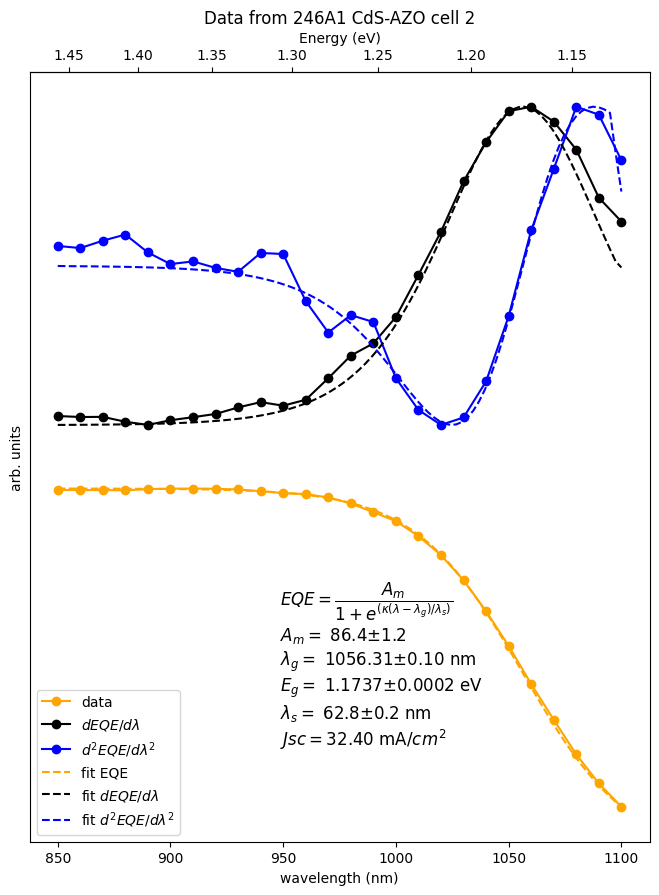

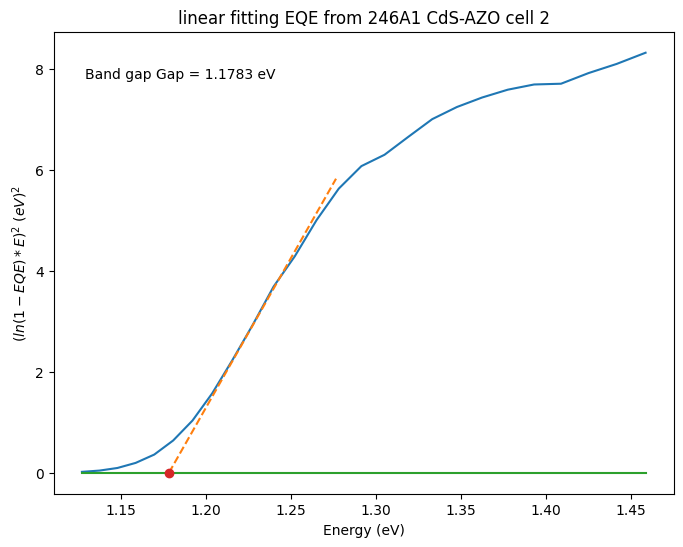

In [ ]:
low_limit = 850
max_limit = 1100

for file in files:
  data = get_data_from_txt(file)
  Jsc = calculate_Jsc(data)
  print( 'Jsc = {} mA/cm2'.format(Jsc))

  Ydata = data.QE/100
  Xdata = data.WL

  ydata = data.QE[data.WL >= low_limit]
  xdata = data.WL[data.WL >= low_limit]

  p0 = [max(ydata), np.median(xdata),1] # this is an mandatory initial guess

  try:
    popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='lm')
    perr = np.sqrt(np.diag(pcov))

    x = np.linspace(low_limit, max_limit, 100)
    y = sigmoid(x, *popt)

    dE_dl = -np.gradient(ydata, xdata.iloc[1]-xdata.iloc[0])

    ddE_dl = -np.gradient(dE_dl, xdata.iloc[1]-xdata.iloc[0])

    dE_dl1 = -np.gradient(y, x[1]-x[0])

    ddE_dl1 = -np.gradient(dE_dl1, x[1]-x[0])

    f = lambda t: 1239.84193/(t+0.000001)
    g = lambda t: 1239.84193/(t+0.000001)

    fig, ax1 = plt.subplots(figsize=(8,10))

    ax2 = ax1.secondary_xaxis("top", functions=(f,g))


    ax1.plot(xdata, normalize(ydata), 'o-', label='data', c='orange')
    ax1.set_title('Data from ' + file.split('.txt')[0])
    eq_txt = r'$EQE = \dfrac{A_m}{1+e^{(\kappa(\lambda-\lambda_g)/\lambda_s)}}$'
    txt = '\n$A_m =$ {0:.1f}$\pm${3:.1f}\n$\lambda_g =$ {1:.2f}$\pm${4:.2f} nm\n$E_g =$ {3:.4f}$\pm${7:.4f} eV\n$\lambda_s =$ {2:.1f}$\pm${5:.1f} nm\n$Jsc=${8:.2f} mA$/cm^2$'
    ax1.annotate(eq_txt + txt.format(*popt, 1239.84193/popt[1], *perr, perr[1]/popt[1]*1239.84193/popt[1], Jsc), (0.35, 0.15), xycoords='figure fraction', fontsize='large')

    ax1.plot(xdata, normalize(dE_dl)+1.2, 'o-', label='$dEQE/d \lambda$', c='black')
    ax1.plot(xdata, normalize(ddE_dl)+1.2, 'o-', label='$d^2EQE/d \lambda^2$', c='blue')

    ax1.plot(x, normalize(y), '--', label='fit EQE', c='orange')
    ax1.plot(x, normalize(dE_dl1)+1.2, '--', label='fit $dEQE/d \lambda$', c='black')
    ax1.plot(x, normalize(ddE_dl1)+1.2, '--', label='fit $d^2EQE/d \lambda^2$', c='blue')

    ax1.set_ylabel('arb. units')
    ax1.set_xlabel('wavelength (nm)')
    ax2.set_xlabel('Energy (eV)')

    plt.tick_params(
      axis='y',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      left=False,      # ticks along the bottom edge are off
      labelleft=False) # labels along the bottom edge are off

    ax1.legend(loc=3)
    plt.savefig('Eg from EQE - data from ' + file.split('.txt')[0] + '.png')
    plt.show()

  except Exception as error:
    print('ERROR WITH THE SIGMOIDAL FITTING FOR THE FILE: ' + file)
    print(error)
    print('ERROR WITH THE SIGMOIDAL FITTING FOR THE FILE: ' + file)
    continue


  try:
    linear_fitting(g(xdata.values), (np.log((100-ydata.values)/100)*g(xdata.values))**2, file.split('.txt')[0])
  except Exception as error:
    print('ERROR WITH THE LINEAR FITTING FOR THE FILE: ' + file)
    print(error)
    print('ERROR WITH THE LINEAR FITTING FOR THE FILE: ' + file)
    continue


# **EQE plot all samples in the same graph**

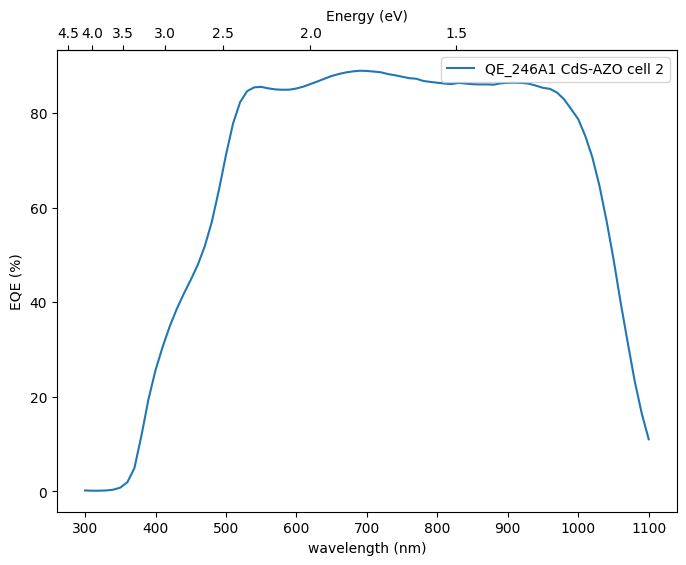

In [ ]:
files = gl.glob('*.txt')

for fil in files:
  data = get_data_from_txt(fil)

  if fil  == files[0]:
    df = pd.DataFrame()
    df.index = data.WL

  df['QE_' + fil.split('.txt')[0]] = data.QE.values

f = lambda t: 1239.84193/(t+0.000001)
g = lambda t: 1239.84193/(t+0.000001)

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.secondary_xaxis("top", functions=(f,g))

df.plot(ax=ax1)

ax1.set_ylabel('EQE (%)')
ax1.set_xlabel('wavelength (nm)')
ax2.set_xlabel('Energy (eV)')
fig.savefig('EQE all together.png')
df.to_excel('data EQE.xlsx')
plt.show()